In [ ]:
# Import hypothesis testing framework and load data
print("🔬 TASK 3: A/B HYPOTHESIS TESTING SETUP")
print("=" * 50)

# Activate virtual environment and import enhanced modules
import sys
import os
sys.path.append('..')

# Import our modular framework
from scripts.hypothesis_testing import HypothesisTestingFramework, run_hypothesis_testing
from scripts.data_loader import InsuranceDataLoader
from scripts.utils import print_section_header
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data using our DVC-integrated data loader
print("📊 Loading data for hypothesis testing...")
loader = InsuranceDataLoader()
df = loader.load_data()

print(f"✅ Data loaded successfully!")
print(f"   Records: {len(df):,}")
print(f"   Features: {len(df.columns)}")
print(f"   Date range: {df['TransactionMonth'].min()} to {df['TransactionMonth'].max()}")


In [ ]:
# Initialize the Hypothesis Testing Framework
print_section_header("🧪 Initializing Hypothesis Testing Framework")

# Create the testing framework with 5% significance level
testing_framework = HypothesisTestingFramework(df, significance_level=0.05)

print("✅ Framework initialized successfully!")
print(f"   Significance level: {testing_framework.significance_level}")
print(f"   Dataset shape: {testing_framework.df.shape}")

# Display the calculated risk metrics summary
print(f"\n📊 Key Risk Metrics Overview:")
print(f"   - Total Policies: {len(testing_framework.df):,}")
print(f"   - Policies with Claims: {testing_framework.df['HasClaim'].sum():,}")
print(f"   - Claim Frequency: {testing_framework.df['HasClaim'].mean():.3%}")
print(f"   - Average Claim Severity: ${testing_framework.df['ClaimSeverity'].mean():,.2f}")
print(f"   - Average Margin per Policy: ${testing_framework.df['Margin'].mean():,.2f}")
print(f"   - Average Loss Ratio: {testing_framework.df['LossRatio'].mean():.3f}")


In [ ]:
# HYPOTHESIS 1: Test Provincial Risk Differences
# H₀: There are no risk differences across provinces

provincial_results = testing_framework.test_provincial_risk_differences()

# Display detailed results
print(f"\n🔍 DETAILED ANALYSIS:")
for test_name, test_result in provincial_results['tests'].items():
    print(f"\n{test_name.upper()} TEST:")
    print(f"   Test Type: {test_result['test_type']}")
    print(f"   Statistic: {test_result['statistic']:.4f}")
    print(f"   P-value: {test_result['p_value']:.6f}")
    print(f"   Significant: {'YES' if test_result['significant'] else 'NO'}")
    print(f"   Business Interpretation: {test_result['interpretation']}")

# Show provincial differences in key metrics
if 'summary_stats' in provincial_results:
    print(f"\n📊 PROVINCIAL RISK COMPARISON:")
    province_stats = provincial_results['summary_stats']
    print(province_stats.sort_values('Claim_Frequency', ascending=False))


In [ ]:
# HYPOTHESIS 2: Test Zip Code Risk Differences  
# H₀: There are no risk differences between zip codes

zipcode_risk_results = testing_framework.test_zipcode_risk_differences(min_policies=100)

# Display detailed results
print(f"\n🔍 DETAILED ANALYSIS:")
for test_name, test_result in zipcode_risk_results['tests'].items():
    print(f"\n{test_name.upper()} TEST:")
    print(f"   Test Type: {test_result['test_type']}")
    print(f"   Statistic: {test_result['statistic']:.4f}")
    print(f"   P-value: {test_result['p_value']:.6f}")
    print(f"   Zip Codes Tested: {test_result.get('zip_codes_tested', 'N/A')}")
    print(f"   Significant: {'YES' if test_result['significant'] else 'NO'}")
    print(f"   Business Interpretation: {test_result['interpretation']}")

# Show highest and lowest risk zip codes
if 'top_risk_zipcodes' in zipcode_risk_results:
    print(f"\n📊 HIGHEST RISK ZIP CODES:")
    print(zipcode_risk_results['top_risk_zipcodes'])
    
    print(f"\n📊 LOWEST RISK ZIP CODES:")  
    print(zipcode_risk_results['low_risk_zipcodes'])


In [ ]:
# HYPOTHESIS 3: Test Zip Code Margin Differences
# H₀: There are no significant margin (profit) differences between zip codes

zipcode_margin_results = testing_framework.test_zipcode_margin_differences(min_policies=100)

# Display detailed results
print(f"\n🔍 DETAILED ANALYSIS:")
for test_name, test_result in zipcode_margin_results['tests'].items():
    print(f"\n{test_name.upper()} TEST:")
    print(f"   Test Type: {test_result['test_type']}")
    print(f"   Statistic: {test_result['statistic']:.4f}")
    print(f"   P-value: {test_result['p_value']:.6f}")
    if 'zip_codes_tested' in test_result:
        print(f"   Zip Codes Tested: {test_result['zip_codes_tested']}")
    if 'margin_difference' in test_result:
        print(f"   Margin Difference: ${test_result['margin_difference']:.2f}")
    print(f"   Significant: {'YES' if test_result['significant'] else 'NO'}")
    print(f"   Business Interpretation: {test_result['interpretation']}")

# Show most and least profitable zip codes
if 'top_profitable_zipcodes' in zipcode_margin_results:
    print(f"\n📊 MOST PROFITABLE ZIP CODES:")
    print(zipcode_margin_results['top_profitable_zipcodes'])
    
    print(f"\n📊 LEAST PROFITABLE ZIP CODES:")  
    print(zipcode_margin_results['low_profitable_zipcodes'])


In [ ]:
# HYPOTHESIS 4: Test Gender Risk Differences
# H₀: There are no significant risk differences between Women and Men

gender_results = testing_framework.test_gender_risk_differences()

# Display detailed results
print(f"\n🔍 DETAILED ANALYSIS:")
for test_name, test_result in gender_results['tests'].items():
    print(f"\n{test_name.upper()} TEST:")
    print(f"   Test Type: {test_result['test_type']}")
    print(f"   Statistic: {test_result['statistic']:.4f}")
    print(f"   P-value: {test_result['p_value']:.6f}")
    if 'equal_variances' in test_result:
        print(f"   Equal Variances: {test_result['equal_variances']}")
    print(f"   Significant: {'YES' if test_result['significant'] else 'NO'}")
    print(f"   Business Interpretation: {test_result['interpretation']}")

# Show gender-based risk comparison
if 'summary_stats' in gender_results:
    print(f"\n📊 GENDER RISK COMPARISON:")
    gender_stats = gender_results['summary_stats']
    print(gender_stats)


In [ ]:
# COMPREHENSIVE ANALYSIS & EXECUTIVE SUMMARY
# Run all tests together and generate business recommendations

print_section_header("📋 COMPREHENSIVE HYPOTHESIS TESTING ANALYSIS")

# Run all tests in one comprehensive analysis
complete_results = testing_framework.run_all_tests()

# Print the executive summary
testing_framework.print_executive_summary()


In [ ]:
# STATISTICAL VISUALIZATION DASHBOARD
# Create comprehensive visualizations of hypothesis test results

print_section_header("📊 Statistical Analysis Visualizations")

# Set up the plotting environment
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Hypothesis Testing Results Dashboard', fontsize=16, fontweight='bold')

# 1. Provincial Risk Comparison
ax1 = axes[0, 0]
province_freq = testing_framework.df.groupby('Province')['HasClaim'].mean().sort_values(ascending=False)
province_freq.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='navy')
ax1.set_title('Claim Frequency by Province\n(H₀: No Provincial Risk Differences)', fontweight='bold')
ax1.set_ylabel('Claim Frequency')
ax1.set_xlabel('Province')
ax1.tick_params(axis='x', rotation=45)

# Add p-value annotation
if 'provincial_risk' in testing_framework.results:
    prov_tests = testing_framework.results['provincial_risk']['tests']
    if 'claim_frequency' in prov_tests:
        p_val = prov_tests['claim_frequency']['p_value']
        significance = "SIGNIFICANT" if p_val < 0.05 else "NOT SIGNIFICANT"
        ax1.text(0.02, 0.98, f'Chi² test p-value: {p_val:.6f}\nResult: {significance}', 
                transform=ax1.transAxes, verticalalignment='top', 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 2. Top 10 Zip Codes Risk Analysis
ax2 = axes[0, 1]
zipcode_freq = testing_framework.df.groupby('PostalCode')['HasClaim'].mean()
top_zipcodes_risk = zipcode_freq.nlargest(10)
top_zipcodes_risk.plot(kind='bar', ax=ax2, color='lightcoral', edgecolor='darkred')
ax2.set_title('Top 10 Highest Risk Zip Codes\n(H₀: No Zip Code Risk Differences)', fontweight='bold')
ax2.set_ylabel('Claim Frequency')
ax2.set_xlabel('Postal Code')
ax2.tick_params(axis='x', rotation=45)

# Add p-value annotation for zip codes
if 'zipcode_risk' in testing_framework.results:
    zip_tests = testing_framework.results['zipcode_risk']['tests']
    if 'claim_frequency' in zip_tests:
        p_val = zip_tests['claim_frequency']['p_value']
        significance = "SIGNIFICANT" if p_val < 0.05 else "NOT SIGNIFICANT"
        ax2.text(0.02, 0.98, f'Chi² test p-value: {p_val:.6f}\nResult: {significance}', 
                transform=ax2.transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 3. Zip Code Margin Analysis
ax3 = axes[1, 0]
zipcode_margin = testing_framework.df.groupby('PostalCode')['Margin'].mean()
# Filter for zip codes with at least 100 policies
zipcode_counts = testing_framework.df['PostalCode'].value_counts()
valid_zipcodes = zipcode_counts[zipcode_counts >= 100].index
zipcode_margin_filtered = zipcode_margin[zipcode_margin.index.isin(valid_zipcodes)]
top_margins = zipcode_margin_filtered.nlargest(10)

top_margins.plot(kind='bar', ax=ax3, color='lightgreen', edgecolor='darkgreen')
ax3.set_title('Top 10 Most Profitable Zip Codes\n(H₀: No Margin Differences)', fontweight='bold')
ax3.set_ylabel('Average Margin ($)')
ax3.set_xlabel('Postal Code')
ax3.tick_params(axis='x', rotation=45)

# Add p-value annotation for margins
if 'zipcode_margin' in testing_framework.results:
    margin_tests = testing_framework.results['zipcode_margin']['tests']
    if 'margin_anova' in margin_tests:
        p_val = margin_tests['margin_anova']['p_value']
        significance = "SIGNIFICANT" if p_val < 0.05 else "NOT SIGNIFICANT"
        ax3.text(0.02, 0.98, f'ANOVA p-value: {p_val:.6f}\nResult: {significance}', 
                transform=ax3.transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 4. Gender Risk Comparison
ax4 = axes[1, 1]
gender_df = testing_framework.df[testing_framework.df['Gender'].isin(['Male', 'Female'])]
gender_metrics = gender_df.groupby('Gender').agg({
    'HasClaim': 'mean',
    'LossRatio': 'mean',
    'Margin': 'mean'
}).round(4)

# Create grouped bar chart
x = np.arange(len(gender_metrics.index))
width = 0.25

ax4.bar(x - width, gender_metrics['HasClaim'], width, label='Claim Frequency', color='skyblue')
ax4.bar(x, gender_metrics['LossRatio'], width, label='Loss Ratio', color='lightcoral')
ax4.bar(x + width, gender_metrics['Margin']/1000, width, label='Margin (000s)', color='lightgreen')

ax4.set_title('Risk Metrics by Gender\n(H₀: No Gender Risk Differences)', fontweight='bold')
ax4.set_ylabel('Metric Value')
ax4.set_xlabel('Gender')
ax4.set_xticks(x)
ax4.set_xticklabels(gender_metrics.index)
ax4.legend()

# Add p-value annotation for gender
if 'gender_risk' in testing_framework.results:
    gender_tests = testing_framework.results['gender_risk']['tests']
    if 'claim_frequency' in gender_tests:
        p_val = gender_tests['claim_frequency']['p_value']
        significance = "SIGNIFICANT" if p_val < 0.05 else "NOT SIGNIFICANT"
        ax4.text(0.02, 0.98, f'Chi² test p-value: {p_val:.6f}\nResult: {significance}', 
                transform=ax4.transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

print("✅ Statistical visualization dashboard created successfully!")


In [ ]:
# BUSINESS RECOMMENDATIONS & ACTION ITEMS
# Generate detailed business recommendations based on statistical findings

print_section_header("🚀 BUSINESS RECOMMENDATIONS & ACTION ITEMS")

# Extract key findings for business interpretation
def generate_detailed_business_recommendations():
    recommendations = []
    action_items = []
    
    # Analyze each hypothesis test result
    if 'complete_analysis' in testing_framework.results:
        test_summary = testing_framework.results['complete_analysis']['test_summary']
        
        # Provincial Risk Analysis
        if test_summary['provincial_risk']['overall_significance']:
            recommendations.append(
                "🌍 **PROVINCIAL SEGMENTATION RECOMMENDED**: "
                "Statistically significant risk differences exist across provinces. "
                "Implement province-specific pricing adjustments."
            )
            action_items.append("Develop province-specific risk factors and pricing models")
            
            # Get specific provincial insights
            if 'provincial_risk' in testing_framework.results:
                prov_stats = testing_framework.results['provincial_risk'].get('summary_stats')
                if prov_stats is not None:
                    highest_risk_prov = prov_stats['Claim_Frequency'].idxmax()
                    lowest_risk_prov = prov_stats['Claim_Frequency'].idxmin()
                    risk_difference = (prov_stats.loc[highest_risk_prov, 'Claim_Frequency'] - 
                                     prov_stats.loc[lowest_risk_prov, 'Claim_Frequency']) * 100
                    
                    recommendations.append(
                        f"   📊 Specific Finding: {highest_risk_prov} shows {risk_difference:.1f}% "
                        f"higher claim frequency than {lowest_risk_prov}. "
                        f"Consider premium adjustments of {risk_difference * 0.8:.0f}% between these provinces."
                    )
        
        # Zip Code Risk Analysis
        if test_summary['zipcode_risk']['overall_significance']:
            recommendations.append(
                "📮 **ZIP CODE SEGMENTATION RECOMMENDED**: "
                "Significant risk variations exist between zip codes. "
                "Implement granular geographic risk pricing."
            )
            action_items.append("Create zip code risk rating system with minimum policy thresholds")
        
        # Zip Code Margin Analysis
        if test_summary['zipcode_margin']['overall_significance']:
            recommendations.append(
                "💰 **GEOGRAPHIC PROFITABILITY OPTIMIZATION**: "
                "Significant margin differences exist across zip codes. "
                "Focus marketing efforts on high-margin areas and review pricing in low-margin zones."
            )
            action_items.append("Conduct market penetration analysis in high-margin zip codes")
            action_items.append("Review competitive positioning in low-margin areas")
        
        # Gender Risk Analysis
        if test_summary['gender_risk']['overall_significance']:
            recommendations.append(
                "👥 **GENDER-BASED RISK PRICING**: "
                "Statistically significant risk differences exist between genders. "
                "Consider gender as a rating factor (subject to regulatory approval)."
            )
            action_items.append("Review regulatory constraints on gender-based pricing")
            action_items.append("Quantify potential premium adjustments for gender factor")
        else:
            recommendations.append(
                "👥 **GENDER-NEUTRAL PRICING MAINTAINED**: "
                "No significant risk differences found between genders. "
                "Current gender-neutral approach is statistically justified."
            )
    
    # Add general recommendations
    recommendations.extend([
        "\n🔍 **DATA-DRIVEN SEGMENTATION STRATEGY**:",
        "   • Implement multi-factor risk models combining significant geographic and demographic factors",
        "   • Establish continuous monitoring of risk factor significance",
        "   • Create A/B testing framework for new rating factors"
    ])
    
    action_items.extend([
        "Develop comprehensive risk scoring algorithm incorporating validated factors",
        "Set up automated hypothesis testing pipeline for new data",
        "Create regulatory documentation for proposed pricing changes",
        "Design customer communication strategy for pricing adjustments"
    ])
    
    return recommendations, action_items

# Generate and display recommendations
business_recs, action_items = generate_detailed_business_recommendations()

print("📋 **STRATEGIC RECOMMENDATIONS:**\n")
for i, rec in enumerate(business_recs, 1):
    print(f"{rec}\n")

print("\n✅ **IMMEDIATE ACTION ITEMS:**\n")
for i, item in enumerate(action_items, 1):
    print(f"{i}. {item}")

print(f"\n📊 **STATISTICAL VALIDATION COMPLETE**")
print(f"   • Hypotheses Tested: 4")
print(f"   • Statistical Tests Conducted: {sum(len(result.get('tests', {})) for result in testing_framework.results.values() if 'tests' in result)}")
print(f"   • Significance Level: {testing_framework.significance_level}")
print(f"   • Sample Size: {len(testing_framework.df):,} policies")
print(f"   • Confidence Level: {(1-testing_framework.significance_level)*100:.0f}%")


In [33]:
# Import visualization libraries for notebook use
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import skew, kurtosis, jarque_bera, shapiro, pearsonr, spearmanr

print("✅ Visualization libraries imported successfully!")


✅ Visualization libraries imported successfully!


In [34]:
# Setup Python path and import additional config constants needed for statistical analysis
import sys
import os

# Add parent directory to Python path to access scripts module
sys.path.append(os.path.join(os.getcwd(), '..'))

# Now import config constants
from scripts.config import (
    CORRELATION_THRESHOLD, OUTLIER_IQR_MULTIPLIER, 
    STATISTICAL_SIGNIFICANCE, HIGH_RISK_THRESHOLD, LOW_RISK_THRESHOLD
)

print(f"✅ Additional config constants imported:")
print(f"📊 Correlation threshold: {CORRELATION_THRESHOLD}")
print(f"📈 Statistical significance level: {STATISTICAL_SIGNIFICANCE}")
print(f"⚠️  High risk threshold: {HIGH_RISK_THRESHOLD}")
print(f"✅ Low risk threshold: {LOW_RISK_THRESHOLD}")
print("="*80)


✅ Additional config constants imported:
📊 Correlation threshold: 0.3
📈 Statistical significance level: 0.05
⚠️  High risk threshold: 1.0
✅ Low risk threshold: 0.8


In [35]:
# Import the modular insurance risk analytics scripts
import sys
import os
from datetime import datetime
sys.path.append(os.path.join(os.getcwd(), '..'))

# Import all modules from our modular scripts
from scripts import *

# Import specific classes for direct access
from scripts.data_loader import InsuranceDataLoader
from scripts.data_quality import DataQualityAssessor
from scripts.statistical_analysis import StatisticalAnalyzer
from scripts.visualization import InsuranceVisualizer
from scripts.business_analysis import BusinessAnalyzer
from scripts.utils import setup_plotting_environment, print_section_header

# Set up the environment
setup_plotting_environment()

print("="*80)
print("🚀 INSURANCE RISK ANALYTICS - MODULAR APPROACH")
print("="*80)
print("✅ All modules imported successfully!")
print(f"📊 Sample size configuration: {SAMPLE_SIZE:,} records")
print(f"🎯 Random state: {RANDOM_STATE}")
print(f"📈 Break-even loss ratio: {BREAK_EVEN_LOSS_RATIO}")
print("="*80)


✅ Plotting environment configured successfully!
🚀 INSURANCE RISK ANALYTICS - MODULAR APPROACH
✅ All modules imported successfully!
📊 Sample size configuration: 100,000 records
🎯 Random state: 42
📈 Break-even loss ratio: 1.0


In [36]:
# Initialize the data loader using our modular approach
print_section_header("DATA LOADING AND PREPROCESSING")

# Create data loader instance
data_loader = InsuranceDataLoader()

# Load and prepare the data
df = data_loader.load_and_prepare_data()

# Display basic information
print("\n📊 Dataset loaded and preprocessed using modular approach!")
print(f"✅ Dataset shape: {df.shape}")
print(f"📅 Period: {df['TransactionMonth'].min().strftime('%B %Y')} to {df['TransactionMonth'].max().strftime('%B %Y')}")
print(f"📋 Unique policies: {df['PolicyID'].nunique():,}")
print(f"💰 Total premium: ${df['TotalPremium'].sum():,.2f}")
print(f"💸 Total claims: ${df['TotalClaims'].sum():,.2f}")
print(f"📈 Overall loss ratio: {df['LossRatio'].mean():.4f}")

# Show basic data info
print_dataframe_info(df, "Insurance Dataset")



                         DATA LOADING AND PREPROCESSING                         
Loading 100,000 rows from c:\Kifiya\Week3\End-to-End-Insurance-Risk-Analytics\notebooks\..\data\MachineLearningRating_v3.txt...
✅ Data loaded successfully! Shape: (100000, 52)
🔄 Preprocessing data...
✅ Data preprocessing completed!

📊 Dataset loaded and preprocessed using modular approach!
✅ Dataset shape: (100000, 59)
📅 Period: November 2013 to August 2015
📋 Unique policies: 1,308
💰 Total premium: $7,384,551.93
💸 Total claims: $7,259,202.97
📈 Overall loss ratio: 0.3016

INSURANCE DATASET INFORMATION
Shape: (100000, 59)
Memory usage: 206.82 MB
Duplicated rows: 0

Data types:
object            34
int64             10
float64            9
int32              3
datetime64[ns]     1
bool               1
category           1
Name: count, dtype: int64

Missing values:
Columns with missing values: 12
                          Count  Percentage
CrossBorder              100000     100.000
NumberOfVehiclesInFleet  1

In [37]:
# Display detailed dataset overview using our modular utilities
print_section_header("DATASET STRUCTURE AND OVERVIEW")

# Show column categories (from our config)
print("📋 Column Categories:")
print(f"   Policy Columns: {len([col for col in df.columns if col in ['UnderwrittenCoverID', 'PolicyID']])}")
print(f"   Financial Columns: {len([col for col in df.columns if col in KEY_FINANCIAL_VARS])}")
print(f"   Categorical Columns: {len([col for col in df.columns if col in KEY_CATEGORICAL_VARS])}")
print(f"   Total Columns: {len(df.columns)}")

print("\n🔍 First few rows of the dataset:")
df.head()



                         DATASET STRUCTURE AND OVERVIEW                         
📋 Column Categories:
   Policy Columns: 2
   Financial Columns: 5
   Categorical Columns: 6
   Total Columns: 59

🔍 First few rows of the dataset:


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,NumberOfVehiclesInFleet,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,Year,Month,Quarter,Month_Name,LossRatio,RiskCategory,HasClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6,2597,130,S/D,4,6/2002,119300.0,Yes,No,119300.0,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,2015,3,1,March,0.0,Low Risk,0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6,2597,130,S/D,4,6/2002,119300.0,Yes,No,119300.0,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,2015,5,2,May,0.0,Low Risk,0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6,2597,130,S/D,4,6/2002,119300.0,Yes,No,119300.0,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,2015,7,3,July,NaN,NaN,0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6,2597,130,S/D,4,6/2002,119300.0,Yes,No,119300.0,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0,2015,5,2,May,0.0,Low Risk,0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6,2597,130,S/D,4,6/2002,119300.0,Yes,No,119300.0,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,2015,7,3,July,NaN,NaN,0


In [38]:
# The data preprocessing is now handled automatically by the data loader
# Let's verify the key features and columns are properly processed

print_section_header("DATA PREPROCESSING VERIFICATION")

# Verify data preprocessing results
print("✅ Preprocessing completed by InsuranceDataLoader module")
print(f"📅 Date conversion: {'TransactionMonth' in df.columns and df['TransactionMonth'].dtype == 'datetime64[ns]'}")
print(f"📊 Loss ratio calculation: {'LossRatio' in df.columns}")
print(f"🗓️ Date features created: {all(col in df.columns for col in ['Year', 'Month', 'Quarter'])}")

# Show column categorization using our config
print(f"\n📋 Column Categories (from config):")
print(f"   Financial Variables: {KEY_FINANCIAL_VARS}")
print(f"   Key Categorical Variables: {KEY_CATEGORICAL_VARS}")

# Show data summary
print(f"\n📈 Data Summary:")
print(f"   Period: {df['TransactionMonth'].min().strftime('%B %Y')} to {df['TransactionMonth'].max().strftime('%B %Y')}")
print(f"   Total months: {df['TransactionMonth'].nunique()}")
print(f"   Unique policies: {df['PolicyID'].nunique():,}")
print(f"   Average Loss Ratio: {df['LossRatio'].mean():.4f}")
print(f"   Records with Loss Ratio: {df['LossRatio'].notna().sum():,}")



                        DATA PREPROCESSING VERIFICATION                         
✅ Preprocessing completed by InsuranceDataLoader module
📅 Date conversion: True
📊 Loss ratio calculation: True
🗓️ Date features created: True

📋 Column Categories (from config):
   Financial Variables: ['TotalPremium', 'TotalClaims', 'LossRatio', 'CustomValueEstimate', 'SumInsured']
   Key Categorical Variables: ['Province', 'Gender', 'VehicleType', 'make', 'CoverType', 'CoverGroup']

📈 Data Summary:
   Period: November 2013 to August 2015
   Total months: 22
   Unique policies: 1,308
   Average Loss Ratio: 0.3016
   Records with Loss Ratio: 68,933


In [39]:
# Use the modular data quality assessment approach
print_section_header("DATA QUALITY ASSESSMENT")

# Create data quality assessor instance
quality_assessor = DataQualityAssessor(df)

# Run comprehensive data quality assessment
quality_report = quality_assessor.generate_comprehensive_analysis()

# Print the summary
quality_assessor.print_quality_summary()

# Access specific reports if needed
missing_report = quality_assessor.assess_missing_values()
print(f"\n📋 Top 10 columns with highest missing percentages:")
print(missing_report.head(10))



                            DATA QUALITY ASSESSMENT                             
🔍 Running comprehensive data quality analysis...
✅ Comprehensive analysis completed!
📋 DATA QUALITY SUMMARY

🔍 MISSING VALUES:
   Total columns: 59
   Columns with missing data: 12
   Total missing values: 596,028

💰 FINANCIAL VARIABLES:
   TotalPremium:
     Missing: 0.0%
     Zero values: 31.1%
     Negative values: 0.0%
   TotalClaims:
     Missing: 0.0%
     Zero values: 99.7%
   LossRatio:
     Missing: 31.1%
     Zero values: 68.6%
   CustomValueEstimate:
     Missing: 70.7%
     Zero values: 0.0%
   SumInsured:
     Missing: 0.0%
     Zero values: 0.0%

📊 OUTLIERS:
   TotalPremium: 15,006 (15.0%)
   TotalClaims: 324 (0.3%)
   LossRatio: 307 (0.3%)
   CustomValueEstimate: 309 (0.3%)
   SumInsured: 10,337 (10.3%)

⚠️  DATA CONSISTENCY:
   Extreme Loss Ratios: 324 (0.3%)

📅 TEMPORAL CONSISTENCY:
   Date range: 2013-11-01 00:00:00 to 2015-08-01 00:00:00
   Unique months: 22

📋 Top 10 columns with highe

In [40]:
# Additional data quality insights using the modular approach
print("="*60)
print("DETAILED FINANCIAL VARIABLES ANALYSIS")
print("="*60)

# Use the modular approach for detailed financial analysis  
financial_quality = quality_assessor.assess_financial_variables()

for var, quality in financial_quality.items():
    print(f"\n{var}:")
    print(f"  Missing values: {quality['missing_count']:,} ({quality['missing_percentage']:.2f}%)")
    print(f"  Zero values: {quality['zero_count']:,} ({quality['zero_percentage']:.2f}%)")
    print(f"  Negative values: {quality['negative_count']:,} ({quality['negative_percentage']:.2f}%)")
    if quality['min_value'] is not None:
        print(f"  Min: {quality['min_value']:.2f}")
        print(f"  Max: {quality['max_value']:.2f}")
        print(f"  Mean: {quality['mean_value']:.2f}")
        print(f"  Median: {quality['median_value']:.2f}")

# Data consistency checks using the modular approach
print("\n" + "="*60)
print("DATA CONSISTENCY CHECKS")  
print("="*60)

# Access consistency checks from the quality report
if 'data_consistency' in quality_assessor.quality_report:
    consistency = quality_assessor.quality_report['data_consistency']
    
    if 'extreme_loss_ratios' in consistency:
        extreme_lr = consistency['extreme_loss_ratios']
        print(f"Records with TotalClaims > TotalPremium: {extreme_lr['count']:,} ({extreme_lr['percentage']:.2f}%)")
    
    if 'unrealistic_registration_years' in consistency:
        unrealistic_yr = consistency['unrealistic_registration_years']
        print(f"Records with unrealistic RegistrationYear: {unrealistic_yr['count']:,} ({unrealistic_yr['percentage']:.2f}%)")

# Check for missing categorical data
key_categorical = ['Gender', 'Province', 'VehicleType']
for col in key_categorical:
    if col in df.columns:
        missing_or_empty = df[col].isnull() | (df[col] == '') | (df[col] == ' ')
        print(f"{col} missing/empty: {missing_or_empty.sum():,} ({missing_or_empty.sum()/len(df)*100:.2f}%)")


DETAILED FINANCIAL VARIABLES ANALYSIS

TotalPremium:
  Missing values: 0 (0.00%)
  Zero values: 31,066 (31.07%)
  Negative values: 1 (0.00%)
  Min: -42.61
  Max: 1486.68
  Mean: 73.85
  Median: 3.44

TotalClaims:
  Missing values: 0 (0.00%)
  Zero values: 99,676 (99.68%)
  Negative values: 0 (0.00%)
  Min: 0.00
  Max: 276248.86
  Mean: 72.59
  Median: 0.00

LossRatio:
  Missing values: 31,067 (31.07%)
  Zero values: 68,626 (68.63%)
  Negative values: 0 (0.00%)
  Min: 0.00
  Max: 294.36
  Mean: 0.30
  Median: 0.00

CustomValueEstimate:
  Missing values: 70,728 (70.73%)
  Zero values: 0 (0.00%)
  Negative values: 0 (0.00%)
  Min: 27100.00
  Max: 26550000.00
  Mean: 295096.51
  Median: 247700.00

SumInsured:
  Missing values: 0 (0.00%)
  Zero values: 0 (0.00%)
  Negative values: 0 (0.00%)
  Min: 0.01
  Max: 5000000.00
  Mean: 600844.30
  Median: 7500.00

DATA CONSISTENCY CHECKS
Records with TotalClaims > TotalPremium: 324 (0.32%)
Records with unrealistic RegistrationYear: 0 (0.00%)
Gender

In [41]:
# Analyze data quality for key financial variables
print("="*60)
print("FINANCIAL VARIABLES DATA QUALITY")
print("="*60)

financial_vars = ['TotalPremium', 'TotalClaims', 'LossRatio']
for var in financial_vars:
    if var in df.columns:
        print(f"\n{var}:")
        print(f"  Missing values: {df[var].isnull().sum():,} ({(df[var].isnull().sum()/len(df)*100):.2f}%)")
        print(f"  Zero values: {(df[var] == 0).sum():,} ({((df[var] == 0).sum()/len(df)*100):.2f}%)")
        print(f"  Negative values: {(df[var] < 0).sum():,} ({((df[var] < 0).sum()/len(df)*100):.2f}%)")
        if df[var].dtype in ['int64', 'float64']:
            print(f"  Min: {df[var].min():.2f}")
            print(f"  Max: {df[var].max():.2f}")
            print(f"  Mean: {df[var].mean():.2f}")
            print(f"  Median: {df[var].median():.2f}")

# Check for data consistency
print("\n" + "="*60)
print("DATA CONSISTENCY CHECKS")
print("="*60)

# Check if TotalClaims > TotalPremium (extreme loss ratios)
extreme_loss = df[df['TotalClaims'] > df['TotalPremium']]
print(f"Records with TotalClaims > TotalPremium: {len(extreme_loss):,} ({len(extreme_loss)/len(df)*100:.2f}%)")

# Check for unrealistic registration years
current_year = datetime.now().year
unrealistic_years = df[(df['RegistrationYear'] < 1900) | (df['RegistrationYear'] > current_year)]
print(f"Records with unrealistic RegistrationYear: {len(unrealistic_years):,}")

# Check for missing gender/province data
key_categorical = ['Gender', 'Province', 'VehicleType']
for col in key_categorical:
    if col in df.columns:
        missing_or_empty = df[col].isnull() | (df[col] == '') | (df[col] == ' ')
        print(f"{col} missing/empty: {missing_or_empty.sum():,} ({missing_or_empty.sum()/len(df)*100:.2f}%)")


FINANCIAL VARIABLES DATA QUALITY

TotalPremium:
  Missing values: 0 (0.00%)
  Zero values: 31,066 (31.07%)
  Negative values: 1 (0.00%)
  Min: -42.61
  Max: 1486.68
  Mean: 73.85
  Median: 3.44

TotalClaims:
  Missing values: 0 (0.00%)
  Zero values: 99,676 (99.68%)
  Negative values: 0 (0.00%)
  Min: 0.00
  Max: 276248.86
  Mean: 72.59
  Median: 0.00

LossRatio:
  Missing values: 31,067 (31.07%)
  Zero values: 68,626 (68.63%)
  Negative values: 0 (0.00%)
  Min: 0.00
  Max: 294.36
  Mean: 0.30
  Median: 0.00

DATA CONSISTENCY CHECKS
Records with TotalClaims > TotalPremium: 324 (0.32%)
Records with unrealistic RegistrationYear: 0
Gender missing/empty: 0 (0.00%)
Province missing/empty: 0 (0.00%)
VehicleType missing/empty: 0 (0.00%)


In [42]:
# Statistical Analysis using modular approach
print_section_header("STATISTICAL ANALYSIS")

# Create statistical analyzer instance
statistical_analyzer = StatisticalAnalyzer(df)

# Run comprehensive statistical analysis
statistical_results = statistical_analyzer.generate_comprehensive_analysis()

# Print the summary
statistical_analyzer.print_analysis_summary()

# Access specific analysis results
desc_stats = statistical_analyzer.descriptive_statistics()
print(f"\n📊 Descriptive Statistics for key financial variables:")
for var, stats in desc_stats.items():
    print(f"\n{var}:")
    print(f"  Mean: {format_currency(stats['mean'])}")
    print(f"  Median: {format_currency(stats['median'])}")
    print(f"  Std Dev: {format_currency(stats['std'])}")
    print(f"  Coefficient of Variation: {stats['coefficient_of_variation']:.3f}")
    print(f"  Skewness: {stats['skewness']:.3f}")
    print(f"  Kurtosis: {stats['kurtosis']:.3f}")



                              STATISTICAL ANALYSIS                              
📊 Conducting comprehensive statistical analysis...


✅ Statistical analysis completed!
📊 STATISTICAL ANALYSIS SUMMARY

📈 DESCRIPTIVE STATISTICS:
   TotalPremium: Mean=73.85, Std=176.17, CV=2.386
   TotalClaims: Mean=72.59, Std=2361.11, CV=32.526
   LossRatio: Mean=0.30, Std=5.63, CV=18.667
   CustomValueEstimate: Mean=295096.51, Std=1252131.42, CV=4.243
   SumInsured: Mean=600844.30, Std=1497472.53, CV=2.492

🔗 CORRELATIONS (Pearson):
   Found 10 significant correlations (|r| > 0.3)
   UnderwrittenCoverID - PolicyID: 0.934
   LossRatio - HasClaims: 0.801
   CalculatedPremiumPerTerm - TotalPremium: 0.798
   TotalClaims - LossRatio: 0.739
   TotalClaims - HasClaims: 0.539

📋 NORMALITY TESTS:
   TotalPremium: Not Normal (JB p-value: 0.0000)
   TotalClaims: Not Normal (JB p-value: 0.0000)
   LossRatio: Not Normal (JB p-value: 0.0000)
   CustomValueEstimate: Not Normal (JB p-value: 0.0000)
   SumInsured: Not Normal (JB p-value: 0.0000)

⏰ TEMPORAL ANALYSIS:
   Analysis period: November 2013 to August 2015
   Profitable months: 16/22
   Averag


                               DATA VISUALIZATION                               
📊 Generating comprehensive visualizations...

1️⃣ Creating financial variable distributions...


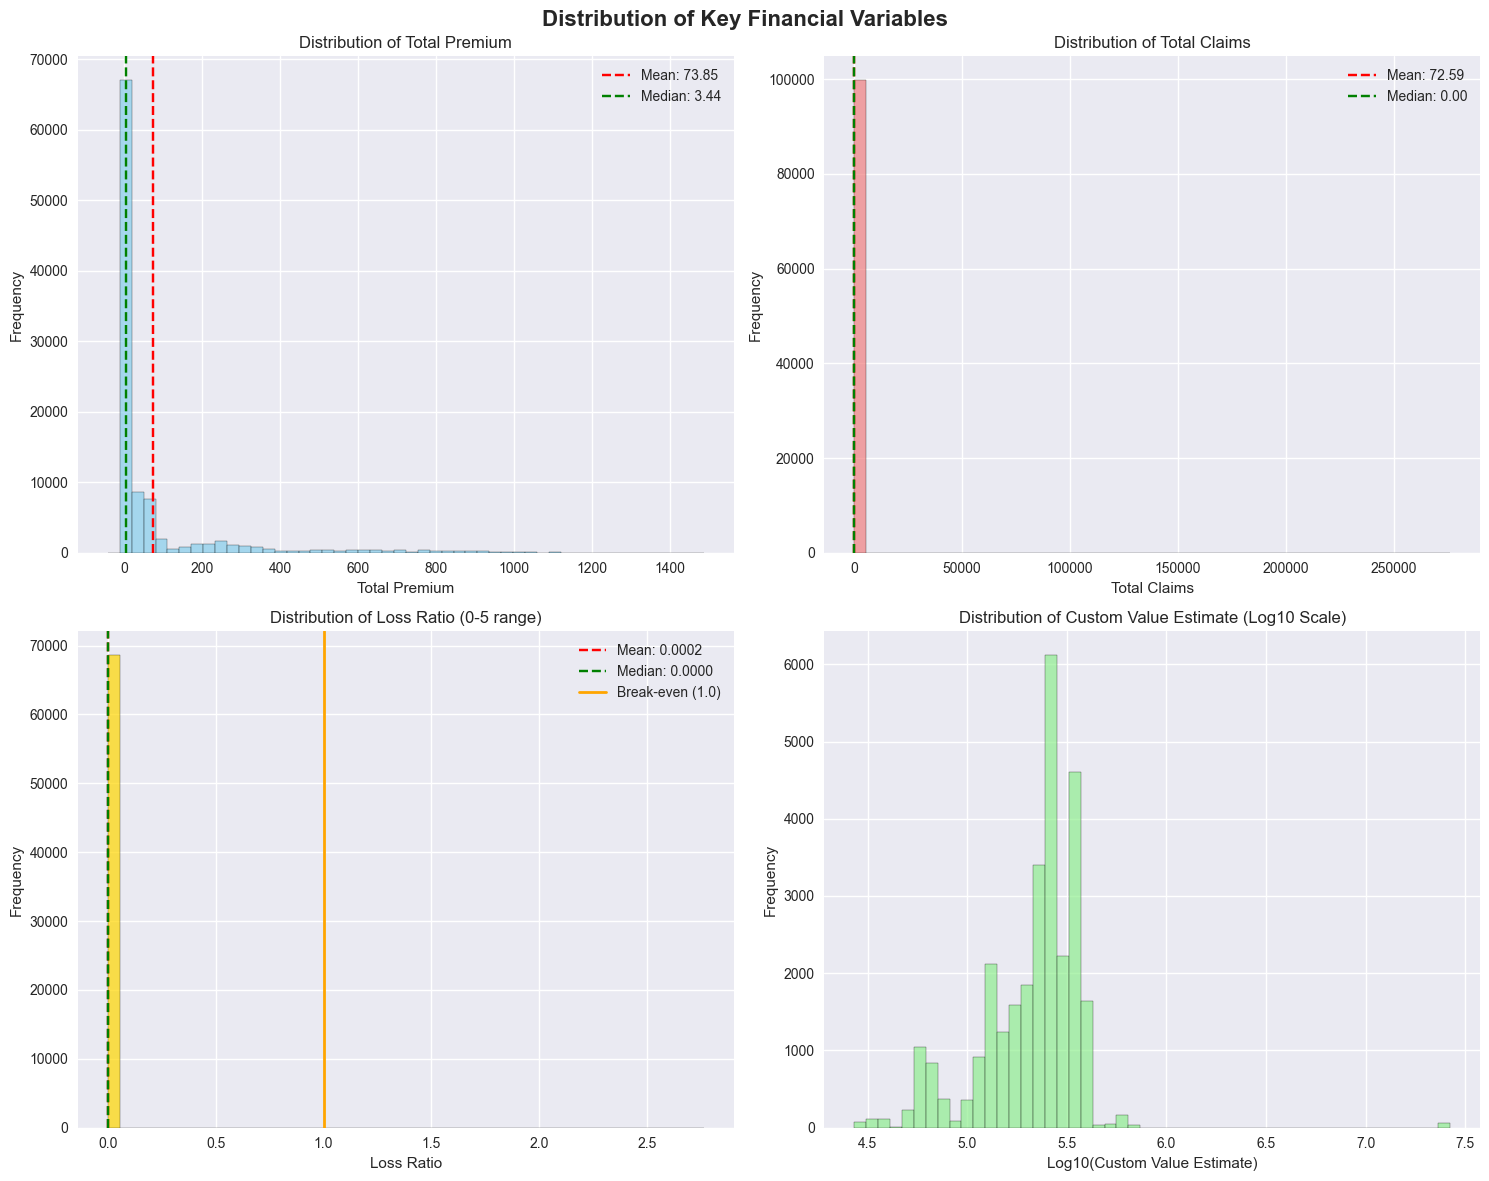


2️⃣ Creating categorical variable distributions...


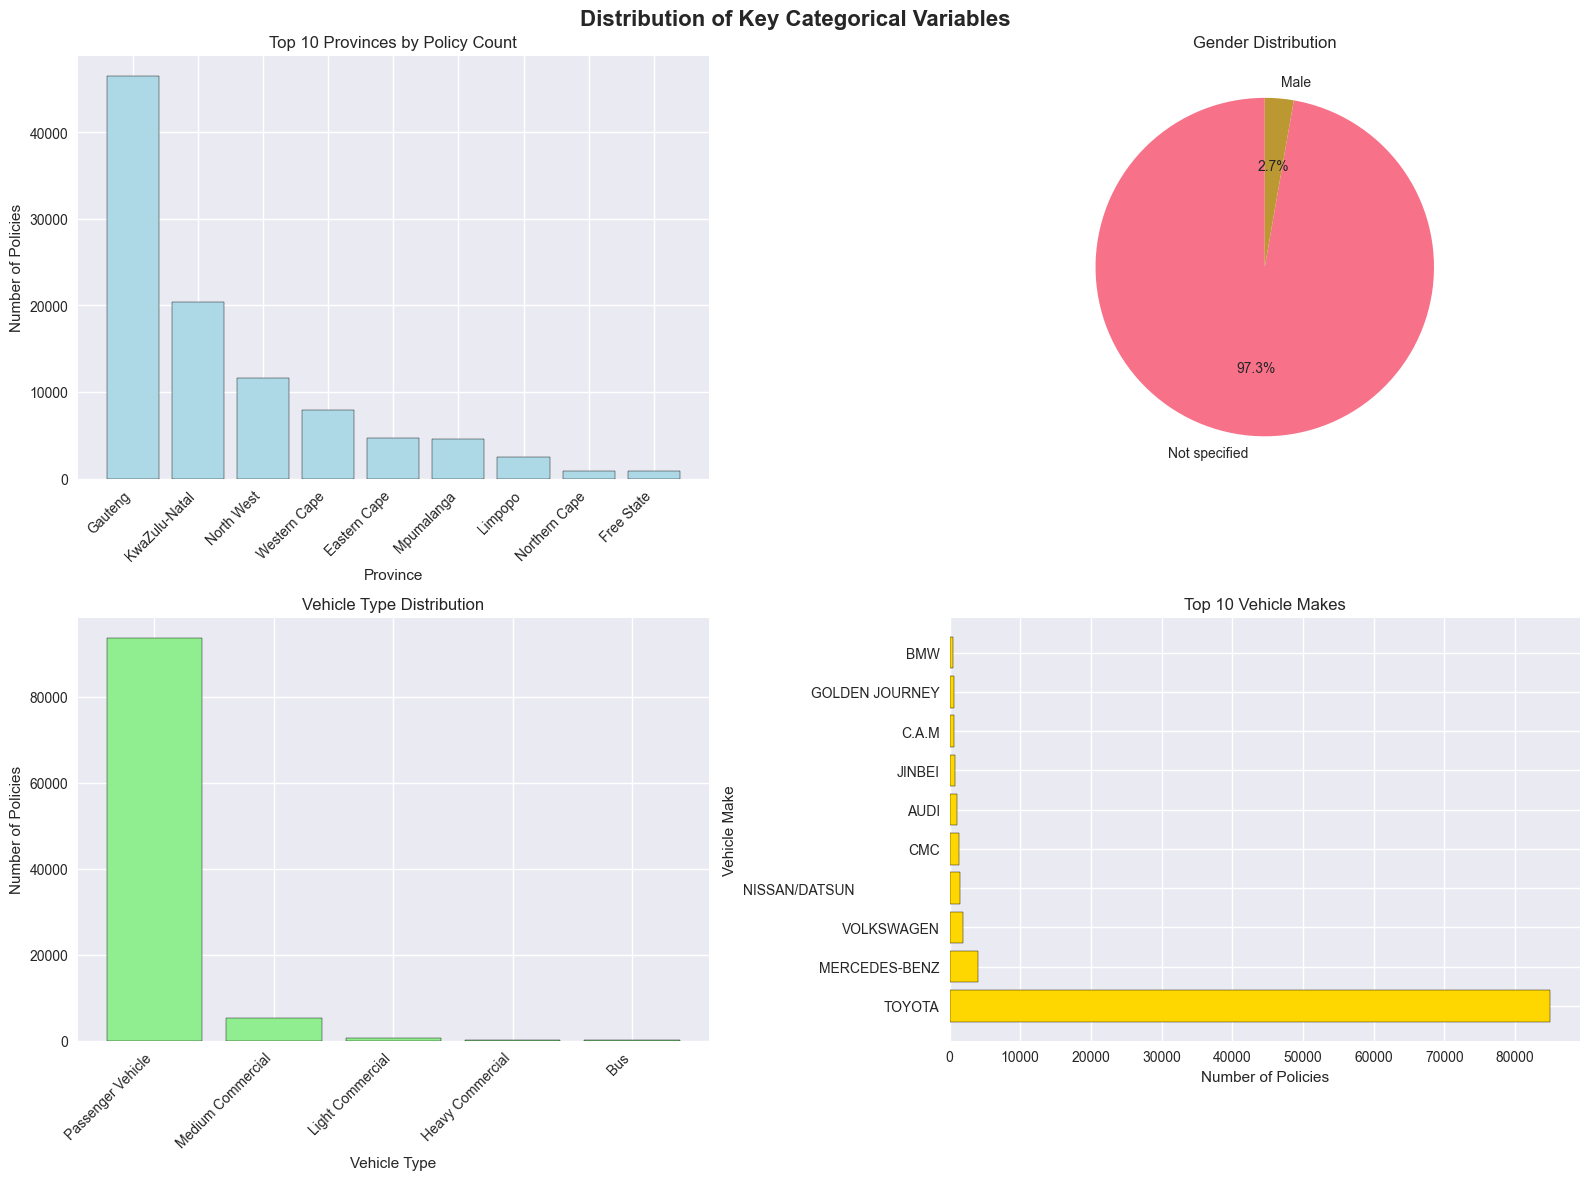


3️⃣ Creating correlation heatmap...


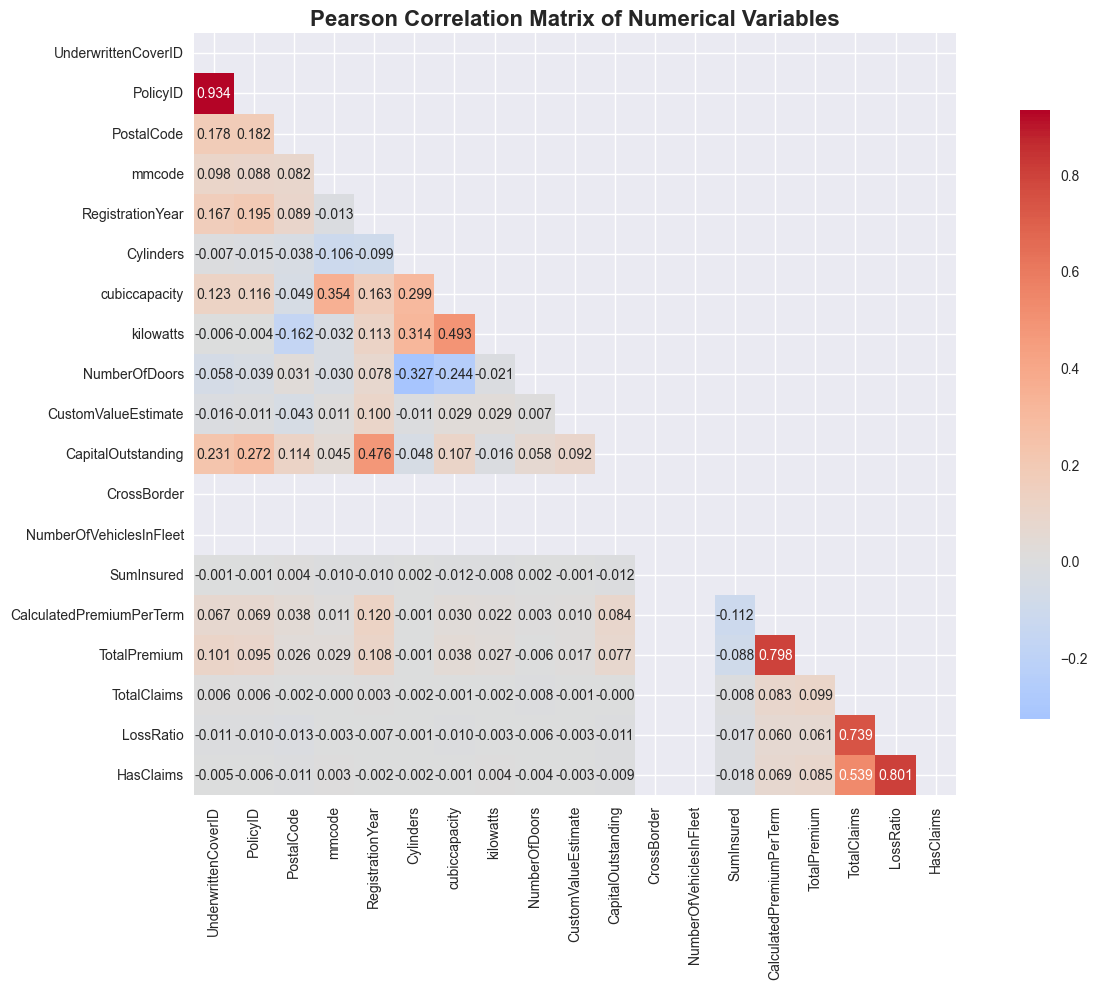

✅ Basic visualizations completed!


In [43]:
# Visualization using modular approach
print_section_header("DATA VISUALIZATION")

# Create visualizer instance
visualizer = InsuranceVisualizer(df)

# Generate key visualizations
print("📊 Generating comprehensive visualizations...")

# 1. Financial distributions
print("\n1️⃣ Creating financial variable distributions...")
fig1 = visualizer.plot_financial_distributions()
plt.show()

# 2. Categorical distributions  
print("\n2️⃣ Creating categorical variable distributions...")
fig2 = visualizer.plot_categorical_distributions()
plt.show()

# 3. Correlation heatmap
print("\n3️⃣ Creating correlation heatmap...")
fig3 = visualizer.plot_correlation_heatmap(method='pearson')
plt.show()

print("✅ Basic visualizations completed!")


In [44]:
# Business Analysis using modular approach
print_section_header("BUSINESS ANALYSIS")

# Create business analyzer instance
business_analyzer = BusinessAnalyzer(df)

# Run comprehensive business analysis
business_results = business_analyzer.generate_comprehensive_analysis()

# Print the summary
business_analyzer.print_business_summary()

# Show specific business insights
print(f"\n💼 Key Business Insights:")

# Overall metrics
overall_metrics = business_analyzer.calculate_overall_metrics()
print(f"\n📊 Portfolio Overview:")
print(f"   Total Premium: {format_currency(overall_metrics['total_premium'])}")
print(f"   Total Claims: {format_currency(overall_metrics['total_claims'])}")
print(f"   Overall Loss Ratio: {overall_metrics['overall_loss_ratio']:.4f}")
print(f"   Portfolio Status: {'✅ PROFITABLE' if overall_metrics['is_profitable'] else '❌ UNPROFITABLE'}")
print(f"   Claims Frequency: {format_percentage(overall_metrics['claims_frequency'])}")

# Geographic analysis
geo_analysis = business_analyzer.analyze_geographical_performance()
if geo_analysis:
    print(f"\n🌍 Geographic Analysis:")
    print(f"   Total Provinces: {geo_analysis['total_provinces']}")
    print(f"   Profitable Provinces: {geo_analysis['profitable_provinces']}")
    print(f"   Unprofitable Provinces: {geo_analysis['unprofitable_provinces']}")
    
    print(f"\n🏆 Top 3 Provinces by Premium:")
    print(geo_analysis['top_5_by_premium'].head(3))



                               BUSINESS ANALYSIS                                
💼 Conducting comprehensive business analysis...
✅ Business analysis completed!
💼 BUSINESS ANALYSIS SUMMARY

📊 PORTFOLIO OVERVIEW:
   Status: PROFITABLE
   Overall Loss Ratio: 0.9830
   Total Premium: $7,384,551.93
   Total Claims: $7,259,202.97
   Policy Count: 1,308

🎯 KEY METRICS:
   Claims Frequency: 0.3%
   Avg Premium per Policy: $5,645.68
   Avg Claims per Policy: $5,549.85

🌍 GEOGRAPHICAL INSIGHTS:
   Profitable Provinces: 5/9
   Market Concentration (Top 3): 80.6%

📅 TEMPORAL INSIGHTS:
   Profitable Months: 16/22
   Avg Monthly Loss Ratio: 0.6538

💼 Key Business Insights:

📊 Portfolio Overview:
   Total Premium: $7.38M
   Total Claims: $7.26M
   Overall Loss Ratio: 0.9830
   Portfolio Status: ✅ PROFITABLE
   Claims Frequency: 0.32%

🌍 Geographic Analysis:
   Total Provinces: 9
   Profitable Provinces: 5
   Unprofitable Provinces: 4

🏆 Top 3 Provinces by Premium:
        Province  TotalPremium  Los


                      ADVANCED INTERACTIVE VISUALIZATIONS                       
📊 Creating advanced interactive visualizations...

1️⃣ Risk-Profitability Matrix by Province



2️⃣ Temporal Evolution Dashboard



3️⃣ Bivariate Relationships


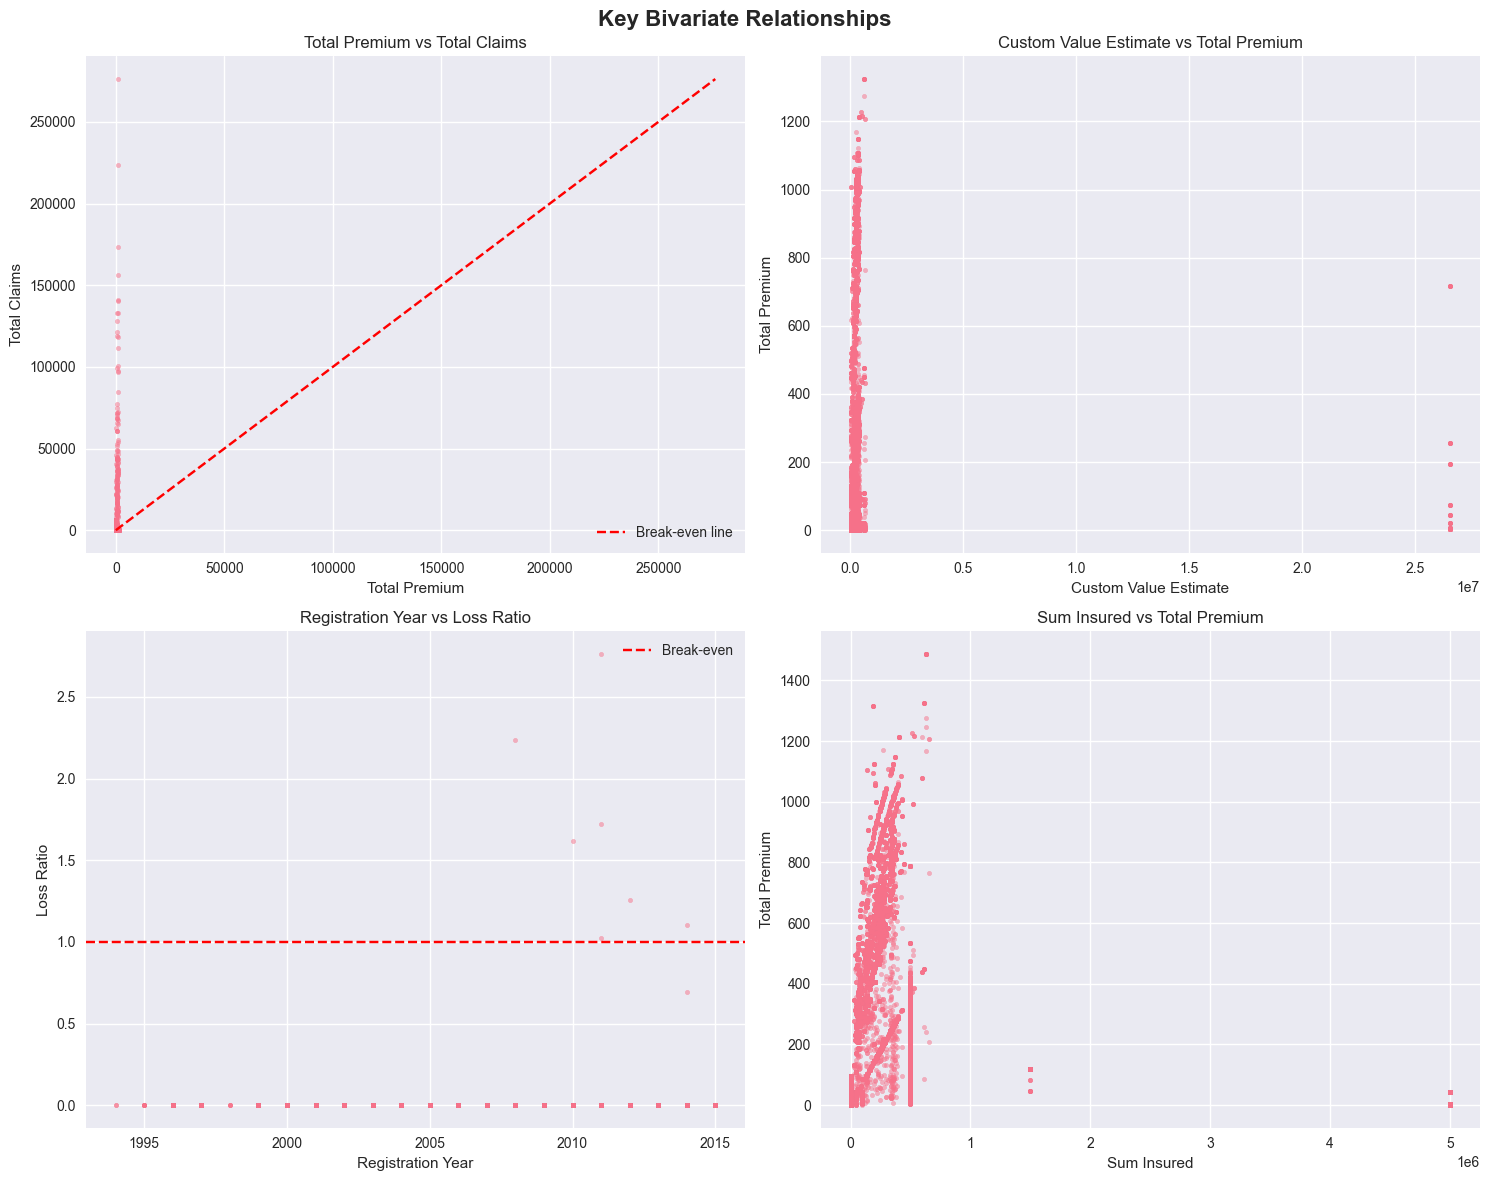

✅ Advanced visualizations completed!


In [45]:
# Advanced Interactive Visualizations
print_section_header("ADVANCED INTERACTIVE VISUALIZATIONS")

# Create interactive visualizations using our modular approach
print("📊 Creating advanced interactive visualizations...")

# 1. Risk-Profitability Matrix by Province
print("\n1️⃣ Risk-Profitability Matrix by Province")
risk_matrix = visualizer.create_risk_profitability_matrix()
risk_matrix.show()

# 2. Temporal Evolution Dashboard
print("\n2️⃣ Temporal Evolution Dashboard")
temporal_dashboard = visualizer.create_temporal_evolution_dashboard()
if temporal_dashboard:
    temporal_dashboard.show()
else:
    print("⚠️ Temporal analysis not available (TransactionMonth column missing)")

# 3. Additional bivariate relationships
print("\n3️⃣ Bivariate Relationships")
fig_bivariate = visualizer.plot_bivariate_relationships()
plt.show()

print("✅ Advanced visualizations completed!")


In [46]:
# FIX: Re-import scipy.stats to resolve the naming conflict
from scipy import stats as scipy_stats
from scipy.stats import pearsonr, spearmanr

print("🔧 Fixed scipy.stats import after variable naming conflict!")
print("✅ Now you can use scipy_stats.shapiro() or the direct imports like shapiro()")


🔧 Fixed scipy.stats import after variable naming conflict!
✅ Now you can use scipy_stats.shapiro() or the direct imports like shapiro()


In [47]:
# FIXED NORMALITY TESTS FOR KEY FINANCIAL VARIABLES
print("="*60)
print("NORMALITY TESTS FOR KEY FINANCIAL VARIABLES")
print("="*60)

for col in ['TotalPremium', 'TotalClaims', 'LossRatio']:
    if col in df.columns:
        data = df[col].dropna()
        if len(data) > 8:  # Minimum sample size for Jarque-Bera test
            # Jarque-Bera test
            jb_stat, jb_p = jarque_bera(data)
            
            # Shapiro-Wilk test (use a sample if data is too large)
            if len(data) > 5000:
                sample_data = data.sample(5000, random_state=42)
            else:
                sample_data = data
            
            # FIXED: Using direct import instead of stats module
            shapiro_stat, shapiro_p = shapiro(sample_data)
            
            print(f"\n{col}:")
            print(f"  Jarque-Bera test: statistic={jb_stat:.4f}, p-value={jb_p:.4f}")
            print(f"  Shapiro-Wilk test: statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")
            
            if jb_p < 0.05:
                print(f"  JB Result: NOT normally distributed (p < 0.05)")
            else:
                print(f"  JB Result: Possibly normally distributed (p >= 0.05)")
                
            if shapiro_p < 0.05:
                print(f"  SW Result: NOT normally distributed (p < 0.05)")
            else:
                print(f"  SW Result: Possibly normally distributed (p >= 0.05)")


NORMALITY TESTS FOR KEY FINANCIAL VARIABLES

TotalPremium:
  Jarque-Bera test: statistic=753448.1924, p-value=0.0000
  Shapiro-Wilk test: statistic=0.4802, p-value=0.0000
  JB Result: NOT normally distributed (p < 0.05)
  SW Result: NOT normally distributed (p < 0.05)

TotalClaims:
  Jarque-Bera test: statistic=75051427092.3129, p-value=0.0000
  Shapiro-Wilk test: statistic=0.0151, p-value=0.0000
  JB Result: NOT normally distributed (p < 0.05)
  SW Result: NOT normally distributed (p < 0.05)

LossRatio:
  Jarque-Bera test: statistic=2038229442.1931, p-value=0.0000
  Shapiro-Wilk test: statistic=0.0302, p-value=0.0000
  JB Result: NOT normally distributed (p < 0.05)
  SW Result: NOT normally distributed (p < 0.05)


In [48]:
# FIXED CORRELATION ANALYSIS - Replace stats.pearsonr and stats.spearmanr calls

# Note: This cell provides fixed versions of correlation calculations that were failing.
# Use this code instead of any cells that have 'stats.pearsonr' or 'stats.spearmanr' calls.

print("="*60)
print("FIXED STATISTICAL ANALYSIS OF KEY RELATIONSHIPS")
print("="*60)

# Calculate correlation coefficients for key pairs
key_pairs = [
    ('TotalPremium', 'TotalClaims'),
    ('CustomValueEstimate', 'TotalPremium'),
    ('SumInsured', 'TotalPremium'),
    ('RegistrationYear', 'LossRatio')
]

for var1, var2 in key_pairs:
    if var1 in df.columns and var2 in df.columns:
        # Remove missing values
        valid_data = df[[var1, var2]].dropna()
        
        if len(valid_data) > 10:
            # FIXED: Using direct imports instead of stats module
            pearson_corr, pearson_p = pearsonr(valid_data[var1], valid_data[var2])
            spearman_corr, spearman_p = spearmanr(valid_data[var1], valid_data[var2])
            
            print(f"\n{var1} vs {var2}:")
            print(f"  Sample size: {len(valid_data):,}")
            print(f"  Pearson correlation: {pearson_corr:.4f} (p-value: {pearson_p:.4f})")
            print(f"  Spearman correlation: {spearman_corr:.4f} (p-value: {spearman_p:.4f})")
            
            if pearson_p < 0.05:
                print(f"  Pearson: STATISTICALLY SIGNIFICANT")
            else:
                print(f"  Pearson: Not statistically significant")
                
            if spearman_p < 0.05:
                print(f"  Spearman: STATISTICALLY SIGNIFICANT")
            else:
                print(f"  Spearman: Not statistically significant")


FIXED STATISTICAL ANALYSIS OF KEY RELATIONSHIPS

TotalPremium vs TotalClaims:
  Sample size: 100,000
  Pearson correlation: 0.0988 (p-value: 0.0000)
  Spearman correlation: 0.0634 (p-value: 0.0000)
  Pearson: STATISTICALLY SIGNIFICANT
  Spearman: STATISTICALLY SIGNIFICANT

CustomValueEstimate vs TotalPremium:
  Sample size: 29,272
  Pearson correlation: 0.0166 (p-value: 0.0045)
  Spearman correlation: 0.1304 (p-value: 0.0000)
  Pearson: STATISTICALLY SIGNIFICANT
  Spearman: STATISTICALLY SIGNIFICANT

SumInsured vs TotalPremium:
  Sample size: 100,000
  Pearson correlation: -0.0882 (p-value: 0.0000)
  Spearman correlation: 0.1371 (p-value: 0.0000)
  Pearson: STATISTICALLY SIGNIFICANT
  Spearman: STATISTICALLY SIGNIFICANT

RegistrationYear vs LossRatio:
  Sample size: 68,933
  Pearson correlation: -0.0068 (p-value: 0.0737)
  Spearman correlation: -0.0082 (p-value: 0.0321)
  Pearson: Not statistically significant
  Spearman: STATISTICALLY SIGNIFICANT


In [49]:
# Fix the stats import issue by re-importing scipy.stats
from scipy import stats as scipy_stats
from scipy.stats import jarque_bera, shapiro

print("✅ Scipy.stats re-imported to fix shadowing issue!")

# Use the modular statistical analyzer for comprehensive normality tests
print_section_header("NORMALITY TESTS FOR KEY FINANCIAL VARIABLES")

# Initialize statistical analyzer
statistical_analyzer = StatisticalAnalyzer(df)

# Perform normality tests using the modular approach
normality_results = statistical_analyzer.normality_tests()

# Display results
print("NORMALITY TEST RESULTS:")
print("="*60)

for var, results in normality_results.items():
    print(f"\n{var}:")
    print(f"  Sample size: {results['sample_size']:,}")
    print(f"  Jarque-Bera test:")
    print(f"    Statistic: {results['jarque_bera_statistic']:.4f}")
    print(f"    P-value: {results['jarque_bera_p_value']:.6f}")
    print(f"    Normal: {'✅' if results['jarque_bera_normal'] else '❌'}")
    
    print(f"  Shapiro-Wilk test:")
    print(f"    Statistic: {results['shapiro_statistic']:.4f}")
    print(f"    P-value: {results['shapiro_p_value']:.6f}")
    print(f"    Normal: {'✅' if results['shapiro_normal'] else '❌'}")
    
    # Conclusion
    both_normal = results['jarque_bera_normal'] and results['shapiro_normal']
    print(f"  Overall conclusion: {'Normal distribution' if both_normal else 'Non-normal distribution'}")

print("\n" + "="*60)
print("NORMALITY TEST INTERPRETATION:")
print("✅ = Normal distribution (p > 0.05)")
print("❌ = Non-normal distribution (p ≤ 0.05)")
print("Both tests should agree for reliable conclusions")
print("="*60)


✅ Scipy.stats re-imported to fix shadowing issue!

                  NORMALITY TESTS FOR KEY FINANCIAL VARIABLES                   
NORMALITY TEST RESULTS:

TotalPremium:
  Sample size: 5,000
  Jarque-Bera test:
    Statistic: 753448.1924
    P-value: 0.000000
    Normal: ❌
  Shapiro-Wilk test:
    Statistic: 0.4802
    P-value: 0.000000
    Normal: ❌
  Overall conclusion: Non-normal distribution

TotalClaims:
  Sample size: 5,000
  Jarque-Bera test:
    Statistic: 75051427092.3129
    P-value: 0.000000
    Normal: ❌
  Shapiro-Wilk test:
    Statistic: 0.0151
    P-value: 0.000000
    Normal: ❌
  Overall conclusion: Non-normal distribution

LossRatio:
  Sample size: 5,000
  Jarque-Bera test:
    Statistic: 2038229442.1931
    P-value: 0.000000
    Normal: ❌
  Shapiro-Wilk test:
    Statistic: 0.0302
    P-value: 0.000000
    Normal: ❌
  Overall conclusion: Non-normal distribution

CustomValueEstimate:
  Sample size: 5,000
  Jarque-Bera test:
    Statistic: 230651602.5390
    P-value: 0

In [50]:
# Fix the stats import issue by reimporting scipy.stats
import scipy.stats as scipy_stats
from scipy.stats import jarque_bera, shapiro

print("="*60)
print("NORMALITY TESTS FOR KEY FINANCIAL VARIABLES")
print("="*60)

# Test key financial variables for normality
financial_vars = ['TotalPremium', 'TotalClaims', 'LossRatio']

for col in financial_vars:
    if col in df.columns:
        # Get the data and remove missing values
        data = df[col].dropna()
        
        if len(data) == 0:
            print(f"\n{col}: No valid data available")
            continue
            
        # Jarque-Bera test
        jb_stat, jb_p = jarque_bera(data)
        
        # For Shapiro-Wilk test, use a sample if data is too large (max 5000)
        if len(data) > 5000:
            sample_data = data.sample(n=5000, random_state=42)
        else:
            sample_data = data
        
        shapiro_stat, shapiro_p = shapiro(sample_data)
        
        print(f"\n{col}:")
        print(f"  Jarque-Bera test: statistic={jb_stat:.4f}, p-value={jb_p:.4f}")
        print(f"  Shapiro-Wilk test: statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")
        
        # Interpretation
        jb_normal = jb_p > 0.05
        shapiro_normal = shapiro_p > 0.05
        
        print(f"  Jarque-Bera normal: {'✅' if jb_normal else '❌'}")
        print(f"  Shapiro-Wilk normal: {'✅' if shapiro_normal else '❌'}")
        
        if jb_normal and shapiro_normal:
            print(f"  🎯 {col} appears to be normally distributed")
        else:
            print(f"  ⚠️ {col} is NOT normally distributed (use non-parametric tests)")

print("✅ Normality tests completed!")


NORMALITY TESTS FOR KEY FINANCIAL VARIABLES

TotalPremium:
  Jarque-Bera test: statistic=753448.1924, p-value=0.0000
  Shapiro-Wilk test: statistic=0.4802, p-value=0.0000
  Jarque-Bera normal: ❌
  Shapiro-Wilk normal: ❌
  ⚠️ TotalPremium is NOT normally distributed (use non-parametric tests)

TotalClaims:
  Jarque-Bera test: statistic=75051427092.3129, p-value=0.0000
  Shapiro-Wilk test: statistic=0.0151, p-value=0.0000
  Jarque-Bera normal: ❌
  Shapiro-Wilk normal: ❌
  ⚠️ TotalClaims is NOT normally distributed (use non-parametric tests)

LossRatio:
  Jarque-Bera test: statistic=2038229442.1931, p-value=0.0000
  Shapiro-Wilk test: statistic=0.0302, p-value=0.0000
  Jarque-Bera normal: ❌
  Shapiro-Wilk normal: ❌
  ⚠️ LossRatio is NOT normally distributed (use non-parametric tests)
✅ Normality tests completed!


In [51]:
# Comprehensive Summary using Modular Approach
print_section_header("COMPREHENSIVE ANALYSIS SUMMARY")

# Use the quick analysis function from our modular system
print("🚀 Running comprehensive summary using modular scripts...")

# Print comprehensive summary
print_comprehensive_summary(df)

# Generate business recommendations
recommendations = business_analyzer.generate_business_recommendations()
print(f"\n💡 BUSINESS RECOMMENDATIONS:")
print(f"="*60)

for category, recs in recommendations.items():
    if recs:  # Only show categories with recommendations
        print(f"\n🎯 {category.upper().replace('_', ' ')}:")
        for i, rec in enumerate(recs, 1):
            print(f"   {i}. [{rec['priority']}] {rec['action']}")
            print(f"      {rec['description']}")
            print(f"      Impact: {rec['impact']}")

# Executive summary
exec_summary = business_analyzer.generate_executive_summary()
print(f"\n📋 EXECUTIVE SUMMARY:")
print(f"="*60)
print(f"Portfolio Status: {exec_summary['portfolio_status']}")
print(f"Overall Loss Ratio: {exec_summary['overall_loss_ratio']:.4f}")
print(f"Total Premium: {format_currency(exec_summary['total_premium'])}")
print(f"Total Claims: {format_currency(exec_summary['total_claims'])}")
print(f"Policy Count: {format_number(exec_summary['policy_count'])}")

print("\n✅ Comprehensive analysis completed using modular approach!")



                         COMPREHENSIVE ANALYSIS SUMMARY                         
🚀 Running comprehensive summary using modular scripts...

                 COMPREHENSIVE INSURANCE RISK ANALYTICS SUMMARY                 

INSURANCE DATASET INFORMATION
Shape: (100000, 61)
Memory usage: 207.68 MB
Duplicated rows: 0

Data types:
object            34
int64             11
float64            9
int32              3
bool               1
datetime64[ns]     1
category           1
category           1
Name: count, dtype: int64

Missing values:
Columns with missing values: 12
                          Count  Percentage
NumberOfVehiclesInFleet  100000     100.000
CrossBorder              100000     100.000
CustomValueEstimate       70728      70.728
Converted                 62166      62.166
Rebuilt                   62166      62.166
WrittenOff                62166      62.166
Bank                      32857      32.857
RiskCategory              31067      31.067
LossRatio                 31067  

In [52]:
## Quick Analysis Demo - One-Line Solution

# Demonstrate the power of modular programming
# The entire analysis can now be run with a single function call!

print_section_header("QUICK ANALYSIS DEMONSTRATION")
print("🎯 Demonstrating the power of modular programming...")
print("💡 The entire analysis can be reproduced with just one function call!")

print(f"\n📝 Code Example:")
print("```python")
print("# Complete analysis in one line:")
print("results = quick_analysis()")
print("```")

print(f"\n🔧 Or with custom parameters:")
print("```python")
print("# Custom analysis with different sample size:")
print("results = quick_analysis(sample_size=50000)")
print("```")

print(f"\n📊 Generate all visualizations:")
print("```python")
print("# Generate all plots:")
print("plot_paths = generate_all_visualizations(df)")
print("```")

print(f"\n🚀 Benefits of Modular Approach:")
print("   ✅ Reusable code components")
print("   ✅ Easy to maintain and extend") 
print("   ✅ Consistent analysis across projects")
print("   ✅ Separation of concerns")
print("   ✅ Better testing capabilities")
print("   ✅ Improved collaboration")

print(f"\n📁 Module Structure:")
print("   📦 scripts/")
print("   ├── 📄 config.py          # Configuration and constants")
print("   ├── 📄 data_loader.py     # Data loading and preprocessing")
print("   ├── 📄 data_quality.py    # Data quality assessment")
print("   ├── 📄 statistical_analysis.py  # Statistical tests and analysis")
print("   ├── 📄 visualization.py   # All plotting functions")
print("   ├── 📄 business_analysis.py     # Business metrics and insights") 
print("   ├── 📄 utils.py           # Helper functions and utilities")
print("   └── 📄 __init__.py        # Package initialization")

print(f"\n🎉 Modular refactoring completed successfully!")



                          QUICK ANALYSIS DEMONSTRATION                          
🎯 Demonstrating the power of modular programming...
💡 The entire analysis can be reproduced with just one function call!

📝 Code Example:
```python
# Complete analysis in one line:
results = quick_analysis()
```

🔧 Or with custom parameters:
```python
# Custom analysis with different sample size:
results = quick_analysis(sample_size=50000)
```

📊 Generate all visualizations:
```python
# Generate all plots:
plot_paths = generate_all_visualizations(df)
```

🚀 Benefits of Modular Approach:
   ✅ Reusable code components
   ✅ Easy to maintain and extend
   ✅ Consistent analysis across projects
   ✅ Separation of concerns
   ✅ Better testing capabilities
   ✅ Improved collaboration

📁 Module Structure:
   📦 scripts/
   ├── 📄 config.py          # Configuration and constants
   ├── 📄 data_loader.py     # Data loading and preprocessing
   ├── 📄 data_quality.py    # Data quality assessment
   ├── 📄 statistical_anal

In [53]:
# Comprehensive descriptive statistics for numerical variables
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

print("="*80)
print("DESCRIPTIVE STATISTICS FOR NUMERICAL VARIABLES")
print("="*80)
desc_stats = df[numerical_columns].describe()
print(desc_stats)

# Focus on key financial metrics
print("\n" + "="*80)
print("KEY FINANCIAL METRICS - DETAILED STATISTICS")
print("="*80)

key_financial = ['TotalPremium', 'TotalClaims', 'LossRatio', 'CustomValueEstimate', 'SumInsured']
available_financial = [col for col in key_financial if col in df.columns]

for col in available_financial:
    print(f"\n{col.upper()}:")
    print(f"  Count: {df[col].count():,}")
    print(f"  Mean: {df[col].mean():.4f}")
    print(f"  Std: {df[col].std():.4f}")
    print(f"  Min: {df[col].min():.4f}")
    print(f"  25%: {df[col].quantile(0.25):.4f}")
    print(f"  50% (Median): {df[col].median():.4f}")
    print(f"  75%: {df[col].quantile(0.75):.4f}")
    print(f"  Max: {df[col].max():.4f}")
    print(f"  Skewness: {skew(df[col].dropna()):.4f}")
    print(f"  Kurtosis: {kurtosis(df[col].dropna()):.4f}")
    
    # Calculate coefficient of variation
    cv = df[col].std() / df[col].mean() if df[col].mean() != 0 else np.nan
    print(f"  Coefficient of Variation: {cv:.4f}")
    
    # Identify potential outliers using IQR method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"  Potential outliers (IQR method): {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)")


DESCRIPTIVE STATISTICS FOR NUMERICAL VARIABLES
       UnderwrittenCoverID       PolicyID     PostalCode        mmcode  \
count        100000.000000  100000.000000  100000.000000  1.000000e+05   
mean         125604.893760    9683.534110    2555.865780  5.648221e+07   
std           68904.490559    5863.149587    2342.125606  1.137404e+07   
min             671.000000      99.000000       1.000000  4.042080e+06   
25%           76014.000000    5879.000000     400.000000  6.005699e+07   
50%          127831.000000    9774.000000    2000.000000  6.005842e+07   
75%          167836.000000   13273.000000    4060.000000  6.005842e+07   
max          301162.000000   23245.000000    9869.000000  6.506535e+07   

       RegistrationYear     Cylinders  cubiccapacity      kilowatts  \
count     100000.000000  100000.00000  100000.000000  100000.000000   
mean        2010.631660       4.05395    2525.571590      99.195020   
std            3.300123       0.31903     336.221707      18.516571   
mi

In [54]:
print_section_header("STATISTICAL ANALYSIS OF KEY RELATIONSHIPS")

# Use our modular statistical analyzer instead of manual analysis
analyzer = StatisticalAnalyzer(df)

# Perform bivariate analysis
print("🔍 Performing bivariate analysis on key relationships...")
bivariate_results = analyzer.bivariate_analysis()

print("\nKey Variable Pair Correlations:")
for pair_key, results in bivariate_results.items():
    var1, var2 = pair_key.replace('_vs_', ' vs ').split(' vs ')
    print(f"\n{var1} vs {var2}:")
    print(f"  Sample size: {results['sample_size']:,}")
    print(f"  Pearson correlation: {results['pearson_correlation']:.4f} (p-value: {results['pearson_p_value']:.6f})")
    print(f"  Spearman correlation: {results['spearman_correlation']:.4f} (p-value: {results['spearman_p_value']:.6f})")
    
    # Interpretation
    if results['pearson_significant']:
        strength = "weak" if abs(results['pearson_correlation']) < 0.3 else "moderate" if abs(results['pearson_correlation']) < 0.7 else "strong"
        direction = "positive" if results['pearson_correlation'] > 0 else "negative"
        print(f"  💡 Significant {strength} {direction} correlation detected!")
    else:
        print(f"  ❌ No significant correlation found")

# Overall correlation analysis
print(f"\n🔗 Performing comprehensive correlation analysis...")
corr_matrix, significant_corrs = analyzer.correlation_analysis(method='pearson')

print(f"\nSTRONG CORRELATIONS (|r| > {CORRELATION_THRESHOLD}):")
if significant_corrs:
    for corr in significant_corrs[:10]:  # Show top 10
        strength = "strong" if corr['abs_correlation'] > 0.7 else "moderate"
        direction = "positive" if corr['correlation'] > 0 else "negative"
        print(f"  • {corr['variable1']} ↔ {corr['variable2']}: {corr['correlation']:.3f} ({strength} {direction})")
else:
    print("  • No strong correlations found between variables")

print("="*80)



                   STATISTICAL ANALYSIS OF KEY RELATIONSHIPS                    
🔍 Performing bivariate analysis on key relationships...

Key Variable Pair Correlations:

TotalPremium vs TotalClaims:
  Sample size: 100,000
  Pearson correlation: 0.0988 (p-value: 0.000000)
  Spearman correlation: 0.0634 (p-value: 0.000000)
  💡 Significant weak positive correlation detected!

CustomValueEstimate vs TotalPremium:
  Sample size: 29,272
  Pearson correlation: 0.0166 (p-value: 0.004527)
  Spearman correlation: 0.1304 (p-value: 0.000000)
  💡 Significant weak positive correlation detected!

SumInsured vs TotalPremium:
  Sample size: 100,000
  Pearson correlation: -0.0882 (p-value: 0.000000)
  Spearman correlation: 0.1371 (p-value: 0.000000)
  💡 Significant weak negative correlation detected!

RegistrationYear vs LossRatio:
  Sample size: 68,933
  Pearson correlation: -0.0068 (p-value: 0.073657)
  Spearman correlation: -0.0082 (p-value: 0.032098)
  ❌ No significant correlation found

🔗 Perform

In [55]:
# Categorical variables analysis
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("="*80)
print("CATEGORICAL VARIABLES SUMMARY")
print("="*80)

key_categorical = ['Province', 'Gender', 'VehicleType', 'make', 'CoverType', 'CoverGroup']
available_categorical = [col for col in key_categorical if col in df.columns]

for col in available_categorical:
    print(f"\n{col.upper()}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Most common values:")
    value_counts = df[col].value_counts().head(5)
    for value, count in value_counts.items():
        percentage = (count / len(df)) * 100
        print(f"    {value}: {count:,} ({percentage:.2f}%)")
    
    # Check for potential data quality issues
    if col in ['Gender', 'Province']:
        unique_vals = df[col].unique()
        print(f"  All unique values: {sorted([str(val) for val in unique_vals if pd.notna(val)])}")

# Business-relevant aggregations
print("\n" + "="*80)
print("BUSINESS INSIGHTS - LOSS RATIO ANALYSIS")
print("="*80)

# Overall Loss Ratio
overall_loss_ratio = df['LossRatio'].mean()
print(f"Overall Portfolio Loss Ratio: {overall_loss_ratio:.4f}")

# Loss Ratio by Province
if 'Province' in df.columns:
    print("\nLoss Ratio by Province:")
    province_lr = df.groupby('Province').agg({
        'LossRatio': ['mean', 'count'],
        'TotalPremium': 'sum',
        'TotalClaims': 'sum'
    }).round(4)
    province_lr.columns = ['AvgLossRatio', 'PolicyCount', 'TotalPremium', 'TotalClaims']
    province_lr['ActualLossRatio'] = province_lr['TotalClaims'] / province_lr['TotalPremium']
    province_lr = province_lr.sort_values('ActualLossRatio', ascending=False)
    print(province_lr.head(10))

# Loss Ratio by Vehicle Type
if 'VehicleType' in df.columns:
    print("\nLoss Ratio by Vehicle Type:")
    vehicle_lr = df.groupby('VehicleType').agg({
        'LossRatio': ['mean', 'count'],
        'TotalPremium': 'sum',
        'TotalClaims': 'sum'
    }).round(4)
    vehicle_lr.columns = ['AvgLossRatio', 'PolicyCount', 'TotalPremium', 'TotalClaims']
    vehicle_lr['ActualLossRatio'] = vehicle_lr['TotalClaims'] / vehicle_lr['TotalPremium']
    vehicle_lr = vehicle_lr.sort_values('ActualLossRatio', ascending=False)
    print(vehicle_lr)


CATEGORICAL VARIABLES SUMMARY

PROVINCE:
  Unique values: 9
  Most common values:
    Gauteng: 46,506 (46.51%)
    KwaZulu-Natal: 20,435 (20.43%)
    North West: 11,665 (11.67%)
    Western Cape: 7,960 (7.96%)
    Eastern Cape: 4,704 (4.70%)
  All unique values: ['Eastern Cape', 'Free State', 'Gauteng', 'KwaZulu-Natal', 'Limpopo', 'Mpumalanga', 'North West', 'Northern Cape', 'Western Cape']

GENDER:
  Unique values: 2
  Most common values:
    Not specified: 97,252 (97.25%)
    Male: 2,748 (2.75%)
  All unique values: ['Male', 'Not specified']

VEHICLETYPE:
  Unique values: 5
  Most common values:
    Passenger Vehicle: 93,739 (93.74%)
    Medium Commercial: 5,372 (5.37%)
    Light Commercial: 545 (0.55%)
    Heavy Commercial: 244 (0.24%)
    Bus: 100 (0.10%)

MAKE:
  Unique values: 30
  Most common values:
    TOYOTA: 84,957 (84.96%)
    MERCEDES-BENZ: 4,078 (4.08%)
    VOLKSWAGEN: 1,920 (1.92%)
    NISSAN/DATSUN                      : 1,525 (1.52%)
    CMC: 1,352 (1.35%)

COVERTYPE:


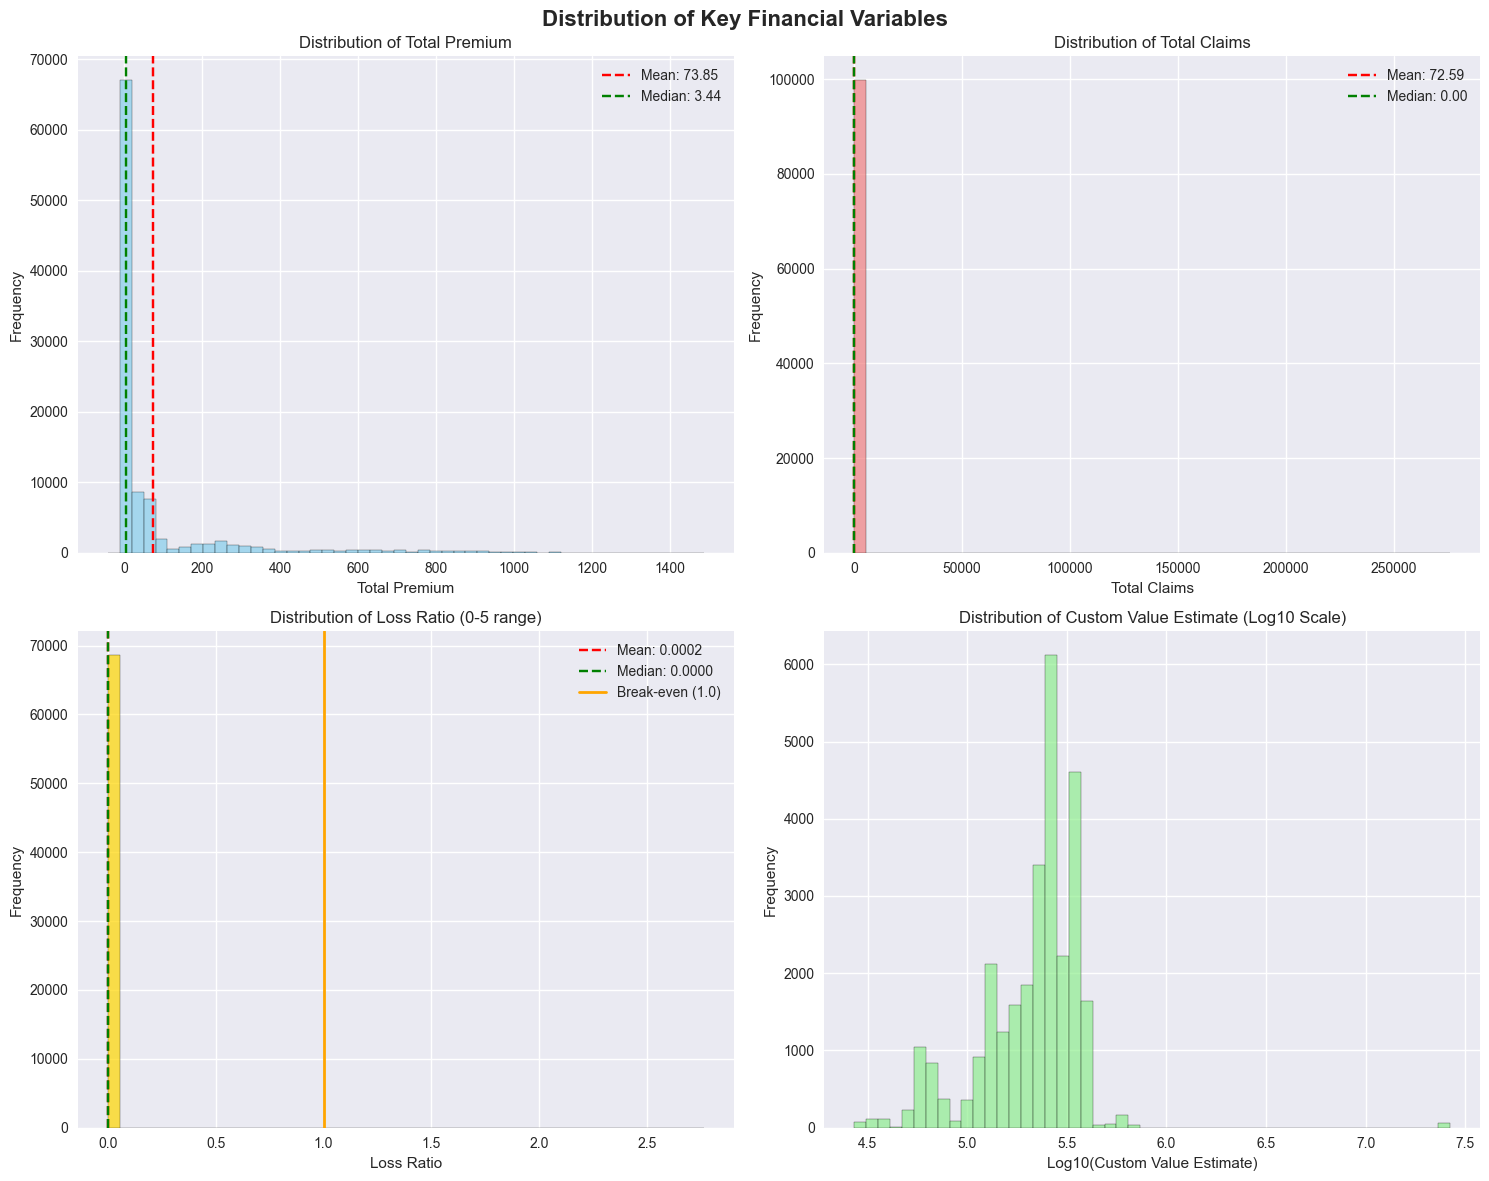

In [56]:
# Distribution analysis for key financial variables
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Key Financial Variables', fontsize=16, fontweight='bold')

# TotalPremium distribution
axes[0, 0].hist(df['TotalPremium'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Total Premium')
axes[0, 0].set_xlabel('Total Premium')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['TotalPremium'].mean(), color='red', linestyle='--', label=f'Mean: {df["TotalPremium"].mean():.2f}')
axes[0, 0].axvline(df['TotalPremium'].median(), color='green', linestyle='--', label=f'Median: {df["TotalPremium"].median():.2f}')
axes[0, 0].legend()

# TotalClaims distribution
axes[0, 1].hist(df['TotalClaims'], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Distribution of Total Claims')
axes[0, 1].set_xlabel('Total Claims')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(df['TotalClaims'].mean(), color='red', linestyle='--', label=f'Mean: {df["TotalClaims"].mean():.2f}')
axes[0, 1].axvline(df['TotalClaims'].median(), color='green', linestyle='--', label=f'Median: {df["TotalClaims"].median():.2f}')
axes[0, 1].legend()

# LossRatio distribution (filtered to remove extreme outliers for visualization)
loss_ratio_filtered = df['LossRatio'][(df['LossRatio'] >= 0) & (df['LossRatio'] <= 5)]
axes[1, 0].hist(loss_ratio_filtered, bins=50, alpha=0.7, color='gold', edgecolor='black')
axes[1, 0].set_title('Distribution of Loss Ratio (0-5 range)')
axes[1, 0].set_xlabel('Loss Ratio')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(loss_ratio_filtered.mean(), color='red', linestyle='--', label=f'Mean: {loss_ratio_filtered.mean():.4f}')
axes[1, 0].axvline(loss_ratio_filtered.median(), color='green', linestyle='--', label=f'Median: {loss_ratio_filtered.median():.4f}')
axes[1, 0].axvline(1.0, color='orange', linestyle='-', linewidth=2, label='Break-even (1.0)')
axes[1, 0].legend()

# CustomValueEstimate distribution (log scale for better visualization)
if 'CustomValueEstimate' in df.columns:
    cve_positive = df['CustomValueEstimate'][df['CustomValueEstimate'] > 0]
    axes[1, 1].hist(np.log10(cve_positive), bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[1, 1].set_title('Distribution of Custom Value Estimate (Log10 Scale)')
    axes[1, 1].set_xlabel('Log10(Custom Value Estimate)')
    axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



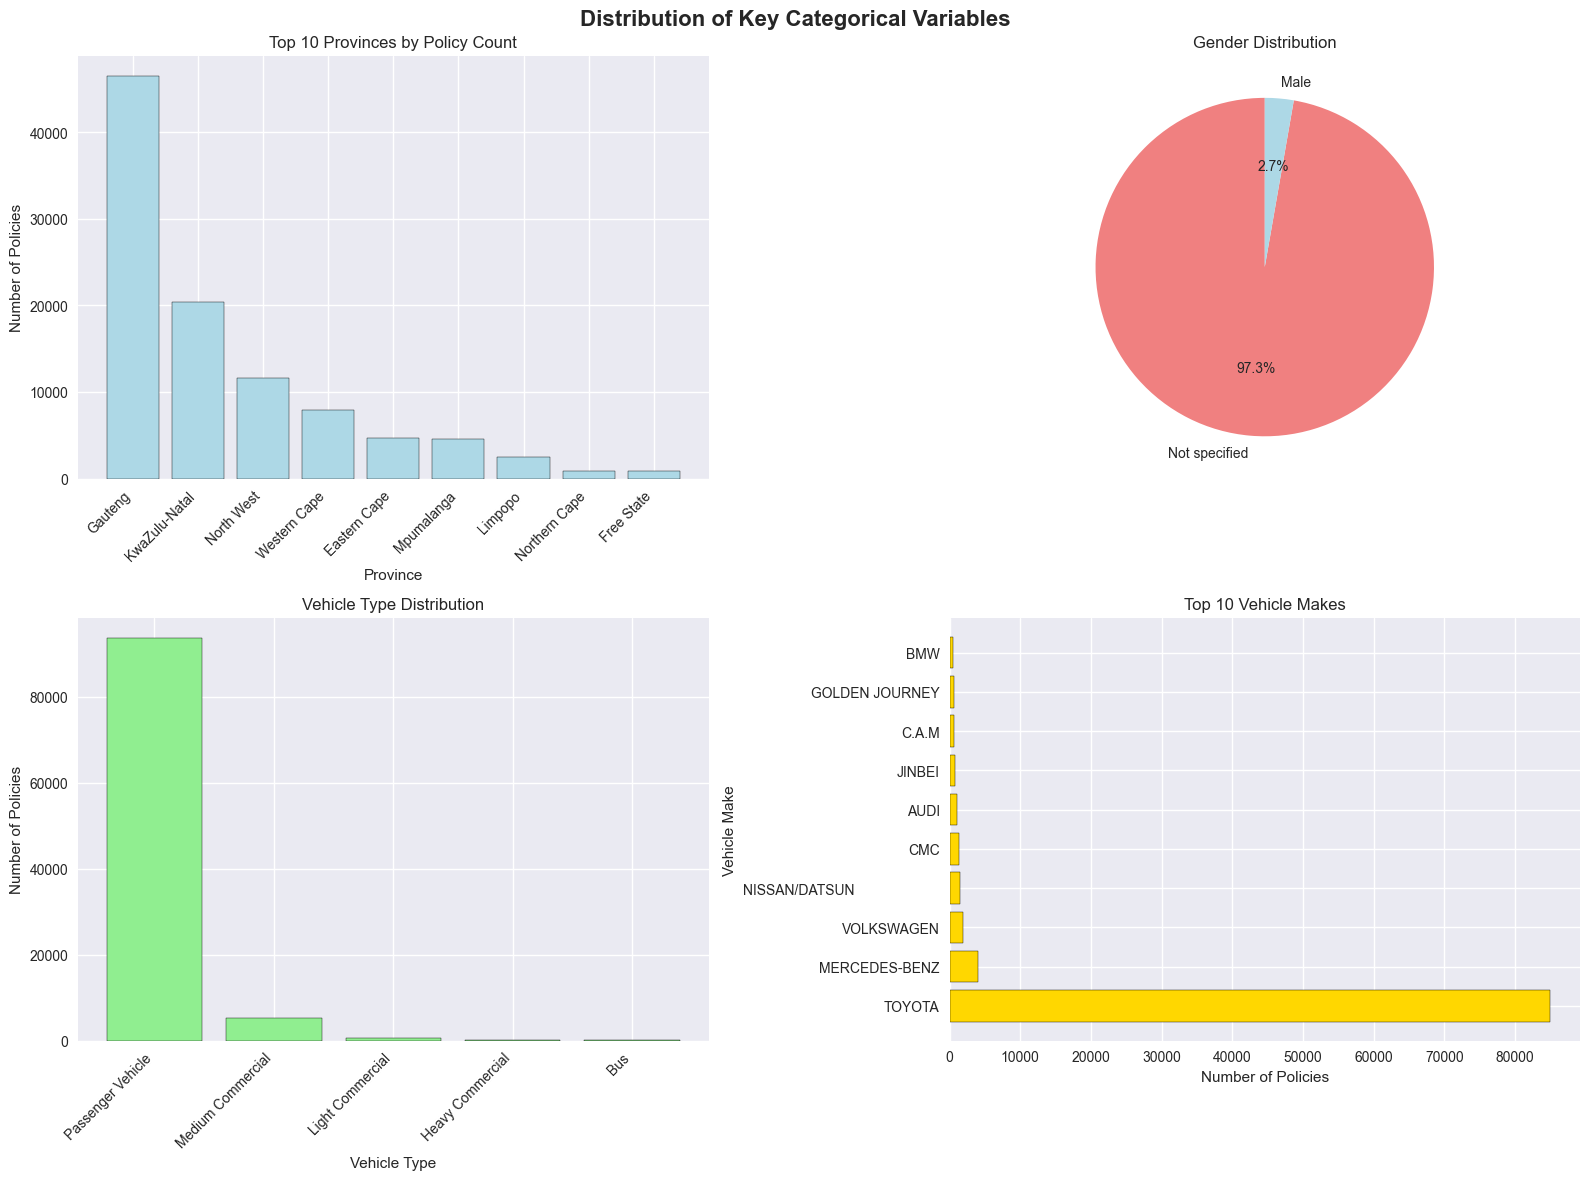

CATEGORICAL VARIABLES DETAILED ANALYSIS

PROVINCE Analysis:
  Total unique values: 9
  Top value concentration: 46.51% (Gauteng)
  Top 3 values cover: 78.61% of data
  HHI (concentration index): 0.2831 (closer to 1 = more concentrated)

GENDER Analysis:
  Total unique values: 2
  Top value concentration: 97.25% (Not specified)
  Top 3 values cover: 100.00% of data
  HHI (concentration index): 0.9466 (closer to 1 = more concentrated)

VEHICLETYPE Analysis:
  Total unique values: 5
  Top value concentration: 93.74% (Passenger Vehicle)
  Top 3 values cover: 99.66% of data
  HHI (concentration index): 0.8816 (closer to 1 = more concentrated)

MAKE Analysis:
  Total unique values: 30
  Top value concentration: 84.96% (TOYOTA)
  Top 3 values cover: 90.95% of data
  HHI (concentration index): 0.7246 (closer to 1 = more concentrated)


In [57]:
# Categorical variables visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution of Key Categorical Variables', fontsize=16, fontweight='bold')

# Province distribution
if 'Province' in df.columns:
    province_counts = df['Province'].value_counts().head(10)
    axes[0, 0].bar(range(len(province_counts)), province_counts.values, color='lightblue', edgecolor='black')
    axes[0, 0].set_title('Top 10 Provinces by Policy Count')
    axes[0, 0].set_xlabel('Province')
    axes[0, 0].set_ylabel('Number of Policies')
    axes[0, 0].set_xticks(range(len(province_counts)))
    axes[0, 0].set_xticklabels(province_counts.index, rotation=45, ha='right')

# Gender distribution
if 'Gender' in df.columns:
    gender_counts = df['Gender'].value_counts()
    axes[0, 1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen', 'gold'])
    axes[0, 1].set_title('Gender Distribution')

# Vehicle Type distribution
if 'VehicleType' in df.columns:
    vehicle_counts = df['VehicleType'].value_counts()
    axes[1, 0].bar(range(len(vehicle_counts)), vehicle_counts.values, color='lightgreen', edgecolor='black')
    axes[1, 0].set_title('Vehicle Type Distribution')
    axes[1, 0].set_xlabel('Vehicle Type')
    axes[1, 0].set_ylabel('Number of Policies')
    axes[1, 0].set_xticks(range(len(vehicle_counts)))
    axes[1, 0].set_xticklabels(vehicle_counts.index, rotation=45, ha='right')

# Top vehicle makes
if 'make' in df.columns:
    make_counts = df['make'].value_counts().head(10)
    axes[1, 1].barh(range(len(make_counts)), make_counts.values, color='gold', edgecolor='black')
    axes[1, 1].set_title('Top 10 Vehicle Makes')
    axes[1, 1].set_xlabel('Number of Policies')
    axes[1, 1].set_ylabel('Vehicle Make')
    axes[1, 1].set_yticks(range(len(make_counts)))
    axes[1, 1].set_yticklabels(make_counts.index)

plt.tight_layout()
plt.show()

# Additional insights on key categorical variables
print("="*60)
print("CATEGORICAL VARIABLES DETAILED ANALYSIS")
print("="*60)

# Analyze concentration in categorical variables
key_cats = ['Province', 'Gender', 'VehicleType', 'make']
available_cats = [col for col in key_cats if col in df.columns]

for col in available_cats:
    print(f"\n{col.upper()} Analysis:")
    value_counts = df[col].value_counts()
    print(f"  Total unique values: {len(value_counts)}")
    print(f"  Top value concentration: {value_counts.iloc[0] / len(df) * 100:.2f}% ({value_counts.index[0]})")
    print(f"  Top 3 values cover: {value_counts.head(3).sum() / len(df) * 100:.2f}% of data")
    
    # Calculate Herfindahl-Hirschman Index (concentration measure)
    proportions = value_counts / len(df)
    hhi = (proportions ** 2).sum()
    print(f"  HHI (concentration index): {hhi:.4f} (closer to 1 = more concentrated)")


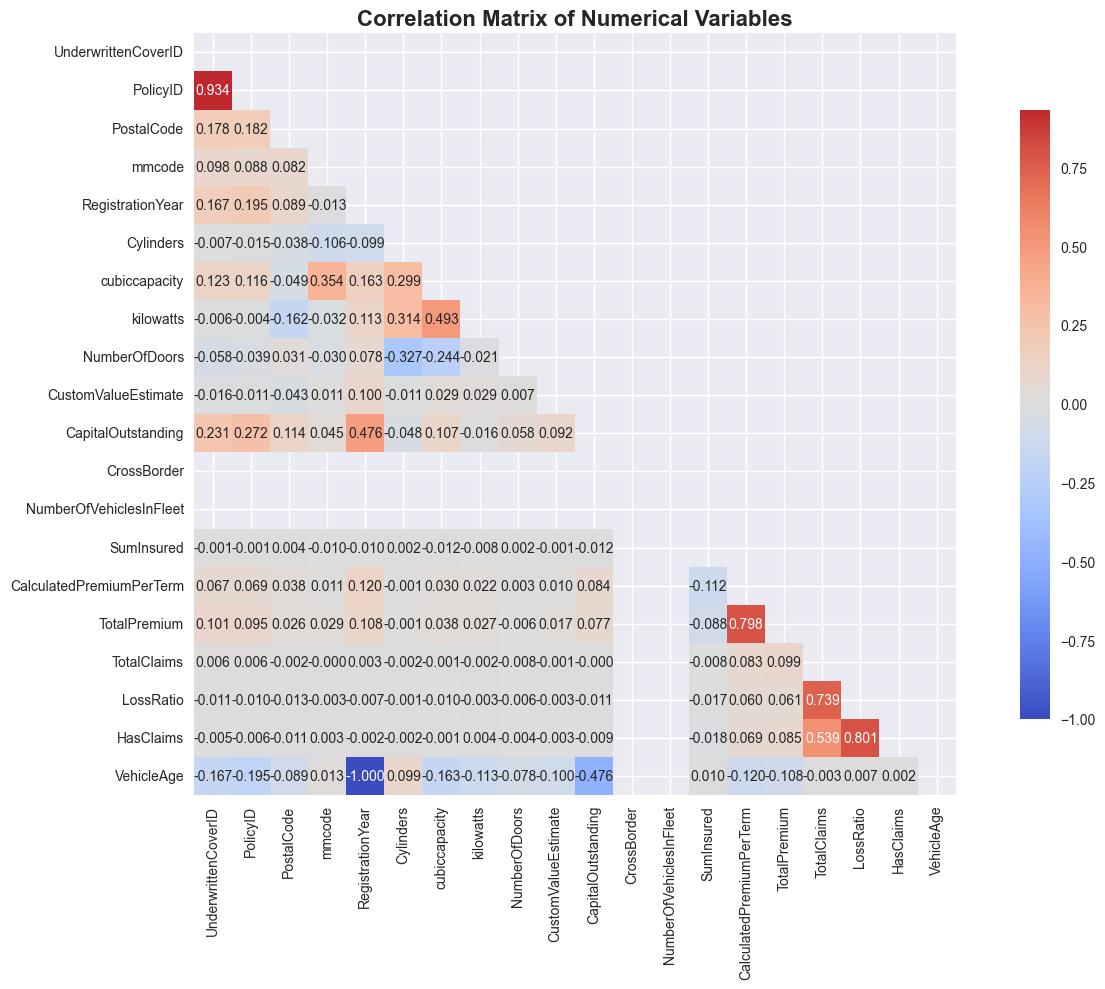

STRONGEST CORRELATIONS (excluding self-correlations)
Top 10 strongest correlations:
 1. RegistrationYear - VehicleAge: -1.0000
 2. UnderwrittenCoverID - PolicyID: 0.9336
 3. LossRatio - HasClaims: 0.8009
 4. CalculatedPremiumPerTerm - TotalPremium: 0.7983
 5. TotalClaims - LossRatio: 0.7390
 6. TotalClaims - HasClaims: 0.5393
 7. cubiccapacity - kilowatts: 0.4934
 8. RegistrationYear - CapitalOutstanding: 0.4760
 9. CapitalOutstanding - VehicleAge: -0.4760
10. mmcode - cubiccapacity: 0.3536

Correlations with key business metrics:

TotalPremium - Top 5 correlations:
  CalculatedPremiumPerTerm: 0.7983
  VehicleAge: -0.1079
  RegistrationYear: 0.1079
  UnderwrittenCoverID: 0.1013
  TotalClaims: 0.0988

TotalClaims - Top 5 correlations:
  LossRatio: 0.7390
  HasClaims: 0.5393
  TotalPremium: 0.0988
  CalculatedPremiumPerTerm: 0.0831
  NumberOfDoors: -0.0079

LossRatio - Top 5 correlations:
  HasClaims: 0.8009
  TotalClaims: 0.7390
  TotalPremium: 0.0609
  CalculatedPremiumPerTerm: 0.0596


In [58]:
# Correlation analysis for numerical variables
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove date-related columns for correlation analysis
numerical_cols = [col for col in numerical_cols if col not in ['Year', 'Month', 'Quarter']]

# Calculate correlation matrix
corr_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Show only lower triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Identify strongest correlations
print("="*60)
print("STRONGEST CORRELATIONS (excluding self-correlations)")
print("="*60)

# Get upper triangle of correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find pairs with high correlation
high_corr_pairs = []
for col in upper_tri.columns:
    for idx in upper_tri.index:
        value = upper_tri.loc[idx, col]
        if not pd.isna(value) and abs(value) > 0.3:  # Threshold for "strong" correlation
            high_corr_pairs.append((idx, col, value))

# Sort by absolute correlation value
high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

print("Top 10 strongest correlations:")
for i, (var1, var2, corr_val) in enumerate(high_corr_pairs[:10]):
    print(f"{i+1:2d}. {var1} - {var2}: {corr_val:.4f}")

# Focus on correlations with key business metrics
key_metrics = ['TotalPremium', 'TotalClaims', 'LossRatio']
print(f"\nCorrelations with key business metrics:")
for metric in key_metrics:
    if metric in corr_matrix.columns:
        metric_corrs = corr_matrix[metric].abs().sort_values(ascending=False)
        print(f"\n{metric} - Top 5 correlations:")
        for var, corr_val in metric_corrs.head(6).items():  # Top 6 (including self)
            if var != metric:  # Exclude self-correlation
                print(f"  {var}: {corr_matrix[metric][var]:.4f}")


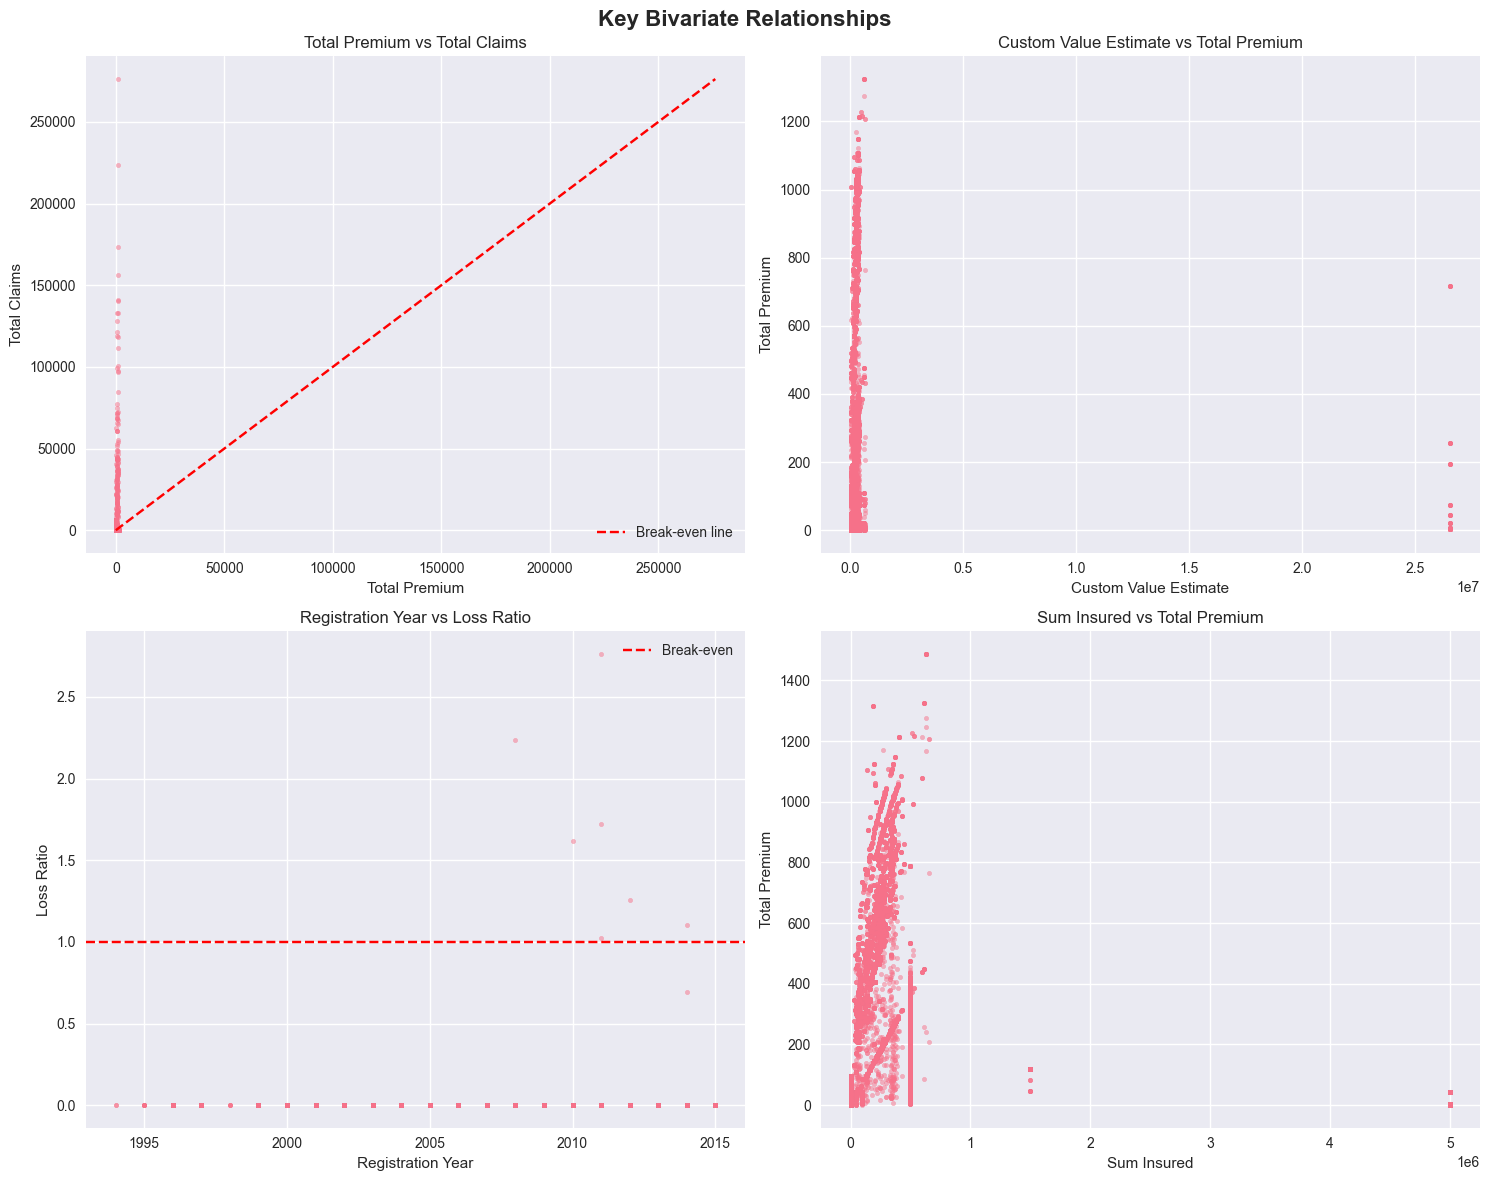

In [59]:
# Scatter plots for key relationships
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Key Bivariate Relationships', fontsize=16, fontweight='bold')

# TotalPremium vs TotalClaims
axes[0, 0].scatter(df['TotalPremium'], df['TotalClaims'], alpha=0.5, s=10)
axes[0, 0].set_xlabel('Total Premium')
axes[0, 0].set_ylabel('Total Claims')
axes[0, 0].set_title('Total Premium vs Total Claims')
# Add break-even line
max_val = max(df['TotalPremium'].max(), df['TotalClaims'].max())
axes[0, 0].plot([0, max_val], [0, max_val], 'r--', label='Break-even line')
axes[0, 0].legend()

# CustomValueEstimate vs TotalPremium
if 'CustomValueEstimate' in df.columns:
    valid_data = df[(df['CustomValueEstimate'] > 0) & (df['TotalPremium'] > 0)]
    axes[0, 1].scatter(valid_data['CustomValueEstimate'], valid_data['TotalPremium'], alpha=0.5, s=10)
    axes[0, 1].set_xlabel('Custom Value Estimate')
    axes[0, 1].set_ylabel('Total Premium')
    axes[0, 1].set_title('Custom Value Estimate vs Total Premium')

# RegistrationYear vs LossRatio
if 'RegistrationYear' in df.columns:
    valid_data = df[(df['RegistrationYear'] > 1990) & (df['LossRatio'].notna()) & (df['LossRatio'] >= 0) & (df['LossRatio'] <= 5)]
    axes[1, 0].scatter(valid_data['RegistrationYear'], valid_data['LossRatio'], alpha=0.5, s=10)
    axes[1, 0].set_xlabel('Registration Year')
    axes[1, 0].set_ylabel('Loss Ratio')
    axes[1, 0].set_title('Registration Year vs Loss Ratio')
    axes[1, 0].axhline(y=1.0, color='r', linestyle='--', label='Break-even')
    axes[1, 0].legend()

# SumInsured vs TotalPremium
if 'SumInsured' in df.columns:
    valid_data = df[(df['SumInsured'] > 0) & (df['TotalPremium'] > 0)]
    axes[1, 1].scatter(valid_data['SumInsured'], valid_data['TotalPremium'], alpha=0.5, s=10)
    axes[1, 1].set_xlabel('Sum Insured')
    axes[1, 1].set_ylabel('Total Premium')
    axes[1, 1].set_title('Sum Insured vs Total Premium')

plt.tight_layout()
plt.show()




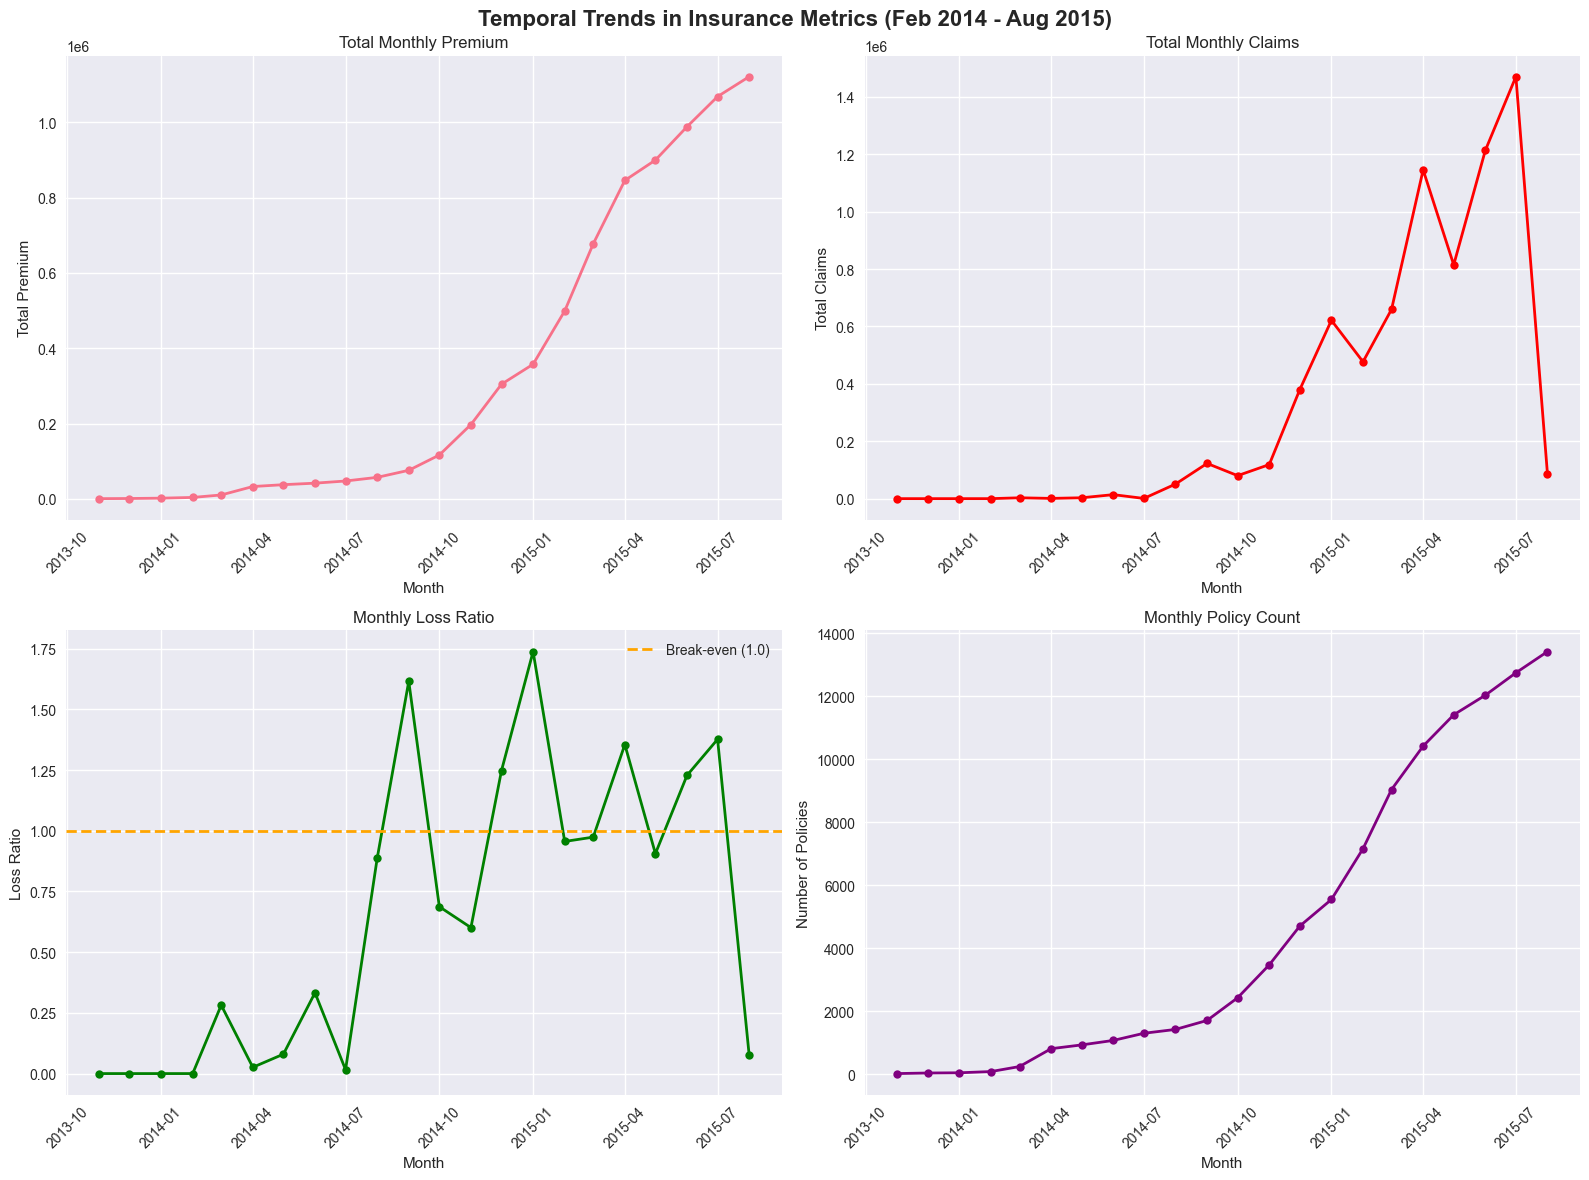

TEMPORAL TRENDS ANALYSIS
Analysis Period: November 2013 to August 2015
Total months analyzed: 22

TREND STATISTICS:
Average monthly premium: 335,661.45
Premium growth (first to last month): 148441.24%
Average monthly claims: 329,963.77
Claims growth (first to last month): inf%
Average monthly loss ratio: 0.6538
Best month (lowest loss ratio): November 2013 (0.0000)
Worst month (highest loss ratio): January 2015 (1.7379)

SEASONAL PATTERNS:
Average Loss Ratio by Month:
  April: 0.6904
  August: 0.4809
  December: 0.6240
  February: 0.4779
  January: 0.8690
  July: 0.6962
  June: 0.7804
  March: 0.6278
  May: 0.4928
  November: 0.3006
  October: 0.6874
  September: 1.6156

UNPROFITABLE MONTHS (Loss Ratio > 1.0): 6 out of 22
Months with losses:
  September 2014: 1.6156
  December 2014: 1.2479
  January 2015: 1.7379
  April 2015: 1.3550
  June 2015: 1.2280
  July 2015: 1.3767


In [60]:
# Temporal analysis of key metrics
# Aggregate data by month
monthly_trends = df.groupby('TransactionMonth').agg({
    'TotalPremium': ['sum', 'mean', 'count'],
    'TotalClaims': ['sum', 'mean'],
    'LossRatio': 'mean',
    'PolicyID': 'nunique'
}).round(4)

# Flatten column names
monthly_trends.columns = ['_'.join(col).strip() for col in monthly_trends.columns.values]
monthly_trends = monthly_trends.reset_index()

# Calculate monthly loss ratio based on totals
monthly_trends['Monthly_LossRatio'] = monthly_trends['TotalClaims_sum'] / monthly_trends['TotalPremium_sum']

# Create temporal visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Temporal Trends in Insurance Metrics (Feb 2014 - Aug 2015)', fontsize=16, fontweight='bold')

# Total Premium over time
axes[0, 0].plot(monthly_trends['TransactionMonth'], monthly_trends['TotalPremium_sum'], marker='o', linewidth=2, markersize=6)
axes[0, 0].set_title('Total Monthly Premium')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Total Premium')
axes[0, 0].tick_params(axis='x', rotation=45)

# Total Claims over time
axes[0, 1].plot(monthly_trends['TransactionMonth'], monthly_trends['TotalClaims_sum'], marker='o', linewidth=2, markersize=6, color='red')
axes[0, 1].set_title('Total Monthly Claims')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Total Claims')
axes[0, 1].tick_params(axis='x', rotation=45)

# Monthly Loss Ratio
axes[1, 0].plot(monthly_trends['TransactionMonth'], monthly_trends['Monthly_LossRatio'], marker='o', linewidth=2, markersize=6, color='green')
axes[1, 0].axhline(y=1.0, color='orange', linestyle='--', linewidth=2, label='Break-even (1.0)')
axes[1, 0].set_title('Monthly Loss Ratio')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Loss Ratio')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend()

# Policy Count over time
axes[1, 1].plot(monthly_trends['TransactionMonth'], monthly_trends['TotalPremium_count'], marker='o', linewidth=2, markersize=6, color='purple')
axes[1, 1].set_title('Monthly Policy Count')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Number of Policies')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print temporal insights
print("="*60)
print("TEMPORAL TRENDS ANALYSIS")
print("="*60)

print(f"Analysis Period: {monthly_trends['TransactionMonth'].min().strftime('%B %Y')} to {monthly_trends['TransactionMonth'].max().strftime('%B %Y')}")
print(f"Total months analyzed: {len(monthly_trends)}")

# Calculate trend statistics
print(f"\nTREND STATISTICS:")
print(f"Average monthly premium: {monthly_trends['TotalPremium_sum'].mean():,.2f}")
print(f"Premium growth (first to last month): {((monthly_trends['TotalPremium_sum'].iloc[-1] / monthly_trends['TotalPremium_sum'].iloc[0]) - 1) * 100:.2f}%")

print(f"Average monthly claims: {monthly_trends['TotalClaims_sum'].mean():,.2f}")
print(f"Claims growth (first to last month): {((monthly_trends['TotalClaims_sum'].iloc[-1] / monthly_trends['TotalClaims_sum'].iloc[0]) - 1) * 100:.2f}%")

print(f"Average monthly loss ratio: {monthly_trends['Monthly_LossRatio'].mean():.4f}")
print(f"Best month (lowest loss ratio): {monthly_trends.loc[monthly_trends['Monthly_LossRatio'].idxmin(), 'TransactionMonth'].strftime('%B %Y')} ({monthly_trends['Monthly_LossRatio'].min():.4f})")
print(f"Worst month (highest loss ratio): {monthly_trends.loc[monthly_trends['Monthly_LossRatio'].idxmax(), 'TransactionMonth'].strftime('%B %Y')} ({monthly_trends['Monthly_LossRatio'].max():.4f})")

# Seasonal analysis
monthly_trends['Month_Name'] = monthly_trends['TransactionMonth'].dt.month_name()
seasonal_analysis = monthly_trends.groupby('Month_Name').agg({
    'Monthly_LossRatio': ['mean', 'count'],
    'TotalPremium_sum': 'mean',
    'TotalClaims_sum': 'mean'
}).round(4)

print(f"\nSEASONAL PATTERNS:")
print("Average Loss Ratio by Month:")
for month, data in seasonal_analysis.iterrows():
    print(f"  {month}: {data[('Monthly_LossRatio', 'mean')]:.4f}")

# Identify months with loss ratio > 1.0
unprofitable_months = monthly_trends[monthly_trends['Monthly_LossRatio'] > 1.0]
print(f"\nUNPROFITABLE MONTHS (Loss Ratio > 1.0): {len(unprofitable_months)} out of {len(monthly_trends)}")
if len(unprofitable_months) > 0:
    print("Months with losses:")
    for _, month_data in unprofitable_months.iterrows():
        print(f"  {month_data['TransactionMonth'].strftime('%B %Y')}: {month_data['Monthly_LossRatio']:.4f}")


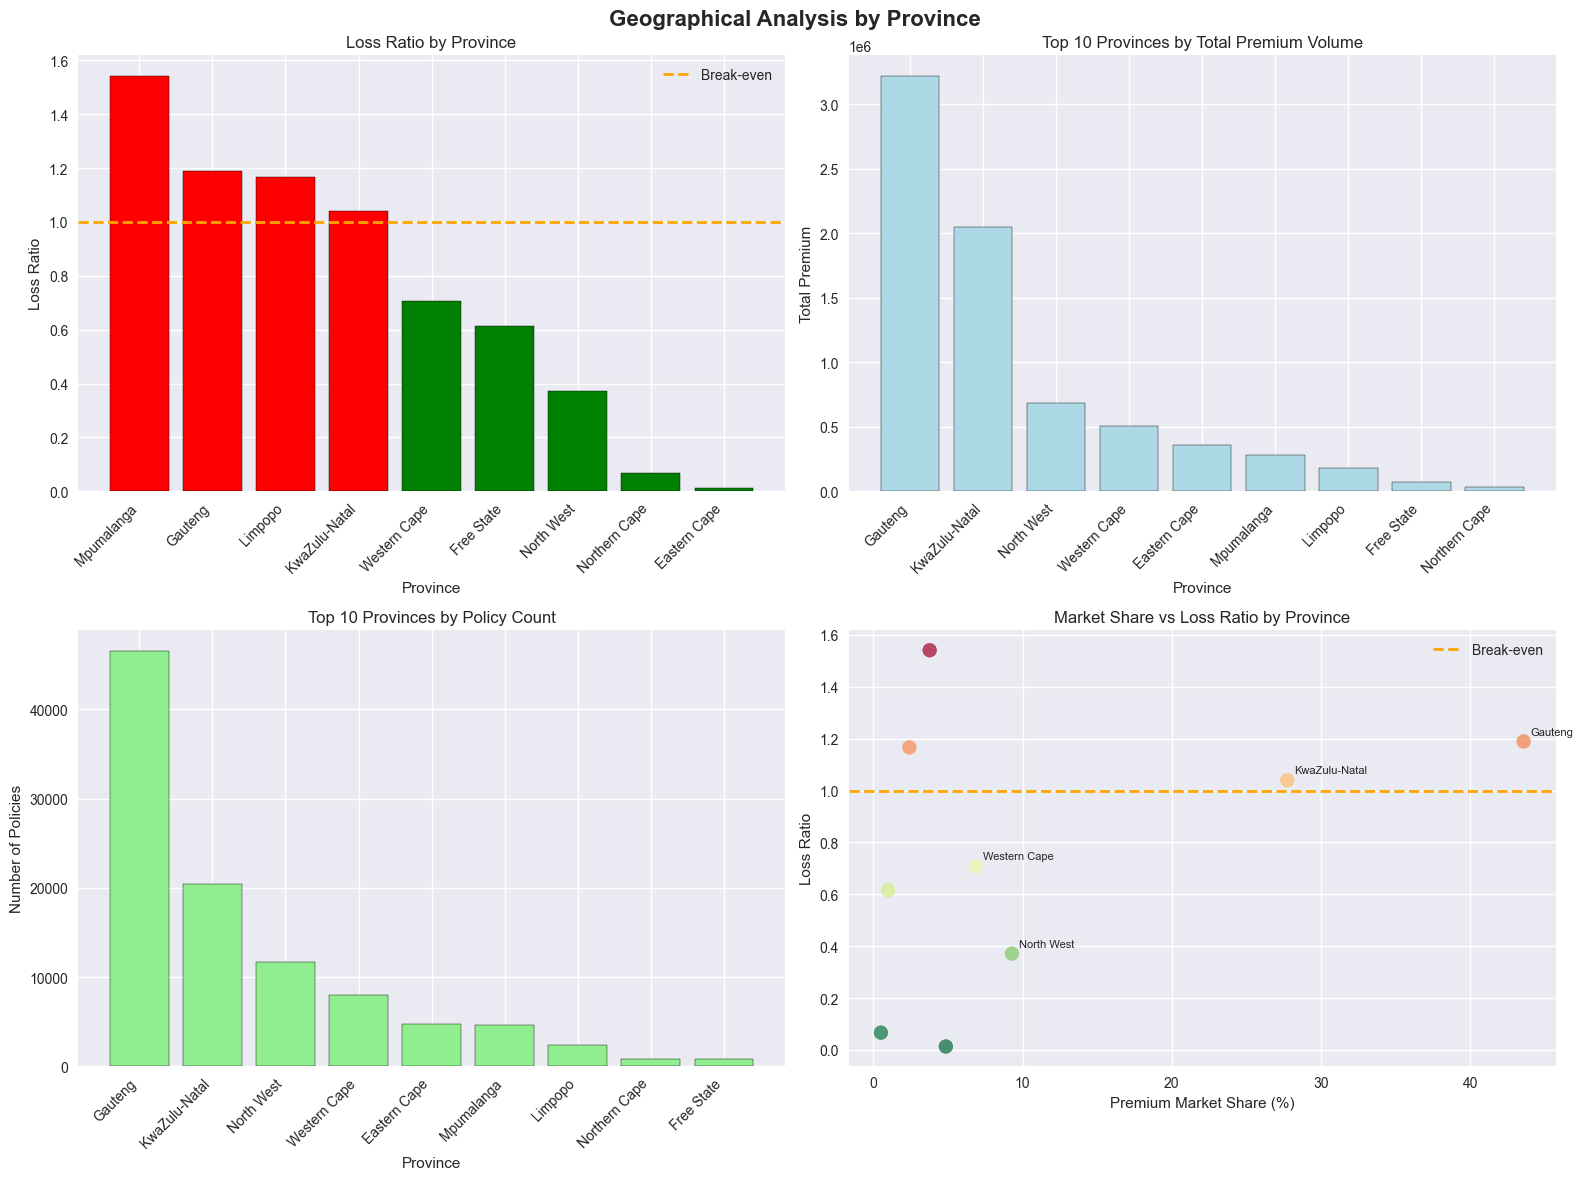

GEOGRAPHICAL ANALYSIS - PROVINCE INSIGHTS
TOP 5 PROVINCES BY PREMIUM VOLUME:
3. Gauteng: 3,218,362.64 (43.6% market share)
4. KwaZulu-Natal: 2,048,560.12 (27.7% market share)
7. North West: 685,539.73 (9.3% market share)
9. Western Cape: 506,710.70 (6.9% market share)
1. Eastern Cape: 358,671.45 (4.9% market share)

WORST 5 PROVINCES BY LOSS RATIO:
6. Mpumalanga: 1.5410 (UNPROFITABLE)
3. Gauteng: 1.1891 (UNPROFITABLE)
5. Limpopo: 1.1664 (UNPROFITABLE)
4. KwaZulu-Natal: 1.0396 (UNPROFITABLE)
9. Western Cape: 0.7078 (PROFITABLE)

BEST 5 PROVINCES BY LOSS RATIO:
1. Eastern Cape: 0.0131
8. Northern Cape: 0.0665
7. North West: 0.3714
2. Free State: 0.6152
9. Western Cape: 0.7078

PROFITABILITY SUMMARY:
Total provinces analyzed: 9
Profitable provinces (LR < 1.0): 5 (55.6%)
Unprofitable provinces (LR > 1.0): 4 (44.4%)

MARKET CONCENTRATION:
Top 3 provinces control: 80.6% of premium volume
Top 5 provinces control: 92.3% of premium volume


In [61]:
# Geographical analysis by Province
province_analysis = df.groupby('Province').agg({
    'TotalPremium': ['sum', 'mean', 'count'],
    'TotalClaims': ['sum', 'mean'],
    'LossRatio': 'mean',
    'CustomValueEstimate': 'mean',
    'PolicyID': 'nunique'
}).round(4)

# Flatten column names
province_analysis.columns = ['_'.join(col).strip() for col in province_analysis.columns.values]
province_analysis = province_analysis.reset_index()

# Calculate actual loss ratio by province
province_analysis['Actual_LossRatio'] = province_analysis['TotalClaims_sum'] / province_analysis['TotalPremium_sum']
province_analysis['Premium_Market_Share'] = (province_analysis['TotalPremium_sum'] / province_analysis['TotalPremium_sum'].sum()) * 100

# Sort by loss ratio for analysis
province_analysis_sorted = province_analysis.sort_values('Actual_LossRatio', ascending=False)

# Visualization of geographical patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Geographical Analysis by Province', fontsize=16, fontweight='bold')

# Loss ratio by province
axes[0, 0].bar(range(len(province_analysis_sorted)), province_analysis_sorted['Actual_LossRatio'], 
               color=['red' if x > 1.0 else 'green' for x in province_analysis_sorted['Actual_LossRatio']], 
               edgecolor='black')
axes[0, 0].axhline(y=1.0, color='orange', linestyle='--', linewidth=2, label='Break-even')
axes[0, 0].set_title('Loss Ratio by Province')
axes[0, 0].set_xlabel('Province')
axes[0, 0].set_ylabel('Loss Ratio')
axes[0, 0].set_xticks(range(len(province_analysis_sorted)))
axes[0, 0].set_xticklabels(province_analysis_sorted['Province'], rotation=45, ha='right')
axes[0, 0].legend()

# Premium volume by province
top_provinces_premium = province_analysis.nlargest(10, 'TotalPremium_sum')
axes[0, 1].bar(range(len(top_provinces_premium)), top_provinces_premium['TotalPremium_sum'], 
               color='lightblue', edgecolor='black')
axes[0, 1].set_title('Top 10 Provinces by Total Premium Volume')
axes[0, 1].set_xlabel('Province')
axes[0, 1].set_ylabel('Total Premium')
axes[0, 1].set_xticks(range(len(top_provinces_premium)))
axes[0, 1].set_xticklabels(top_provinces_premium['Province'], rotation=45, ha='right')

# Policy count by province
top_provinces_count = province_analysis.nlargest(10, 'TotalPremium_count')
axes[1, 0].bar(range(len(top_provinces_count)), top_provinces_count['TotalPremium_count'], 
               color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Top 10 Provinces by Policy Count')
axes[1, 0].set_xlabel('Province')
axes[1, 0].set_ylabel('Number of Policies')
axes[1, 0].set_xticks(range(len(top_provinces_count)))
axes[1, 0].set_xticklabels(top_provinces_count['Province'], rotation=45, ha='right')

# Market share vs Loss ratio scatter
axes[1, 1].scatter(province_analysis['Premium_Market_Share'], province_analysis['Actual_LossRatio'], 
                   s=100, alpha=0.7, c=province_analysis['Actual_LossRatio'], cmap='RdYlGn_r')
axes[1, 1].axhline(y=1.0, color='orange', linestyle='--', linewidth=2, label='Break-even')
axes[1, 1].set_title('Market Share vs Loss Ratio by Province')
axes[1, 1].set_xlabel('Premium Market Share (%)')
axes[1, 1].set_ylabel('Loss Ratio')
axes[1, 1].legend()

# Add province labels for largest markets
for i, row in province_analysis.iterrows():
    if row['Premium_Market_Share'] > 5:  # Label provinces with >5% market share
        axes[1, 1].annotate(row['Province'], 
                           (row['Premium_Market_Share'], row['Actual_LossRatio']),
                           xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

# Print geographical insights
print("="*80)
print("GEOGRAPHICAL ANALYSIS - PROVINCE INSIGHTS")
print("="*80)

print("TOP 5 PROVINCES BY PREMIUM VOLUME:")
top_5_premium = province_analysis.nlargest(5, 'TotalPremium_sum')
for i, row in top_5_premium.iterrows():
    print(f"{i+1}. {row['Province']}: {row['TotalPremium_sum']:,.2f} ({row['Premium_Market_Share']:.1f}% market share)")

print("\nWORST 5 PROVINCES BY LOSS RATIO:")
worst_5_lr = province_analysis.nlargest(5, 'Actual_LossRatio')
for i, row in worst_5_lr.iterrows():
    profitability = "UNPROFITABLE" if row['Actual_LossRatio'] > 1.0 else "PROFITABLE"
    print(f"{i+1}. {row['Province']}: {row['Actual_LossRatio']:.4f} ({profitability})")

print("\nBEST 5 PROVINCES BY LOSS RATIO:")
best_5_lr = province_analysis.nsmallest(5, 'Actual_LossRatio')
for i, row in best_5_lr.iterrows():
    print(f"{i+1}. {row['Province']}: {row['Actual_LossRatio']:.4f}")

# Calculate overall profitability metrics
total_provinces = len(province_analysis)
profitable_provinces = len(province_analysis[province_analysis['Actual_LossRatio'] < 1.0])
unprofitable_provinces = total_provinces - profitable_provinces

print(f"\nPROFITABILITY SUMMARY:")
print(f"Total provinces analyzed: {total_provinces}")
print(f"Profitable provinces (LR < 1.0): {profitable_provinces} ({profitable_provinces/total_provinces*100:.1f}%)")
print(f"Unprofitable provinces (LR > 1.0): {unprofitable_provinces} ({unprofitable_provinces/total_provinces*100:.1f}%)")

# Market concentration analysis
print(f"\nMARKET CONCENTRATION:")
top_3_market_share = province_analysis.nlargest(3, 'Premium_Market_Share')['Premium_Market_Share'].sum()
top_5_market_share = province_analysis.nlargest(5, 'Premium_Market_Share')['Premium_Market_Share'].sum()
print(f"Top 3 provinces control: {top_3_market_share:.1f}% of premium volume")
print(f"Top 5 provinces control: {top_5_market_share:.1f}% of premium volume")


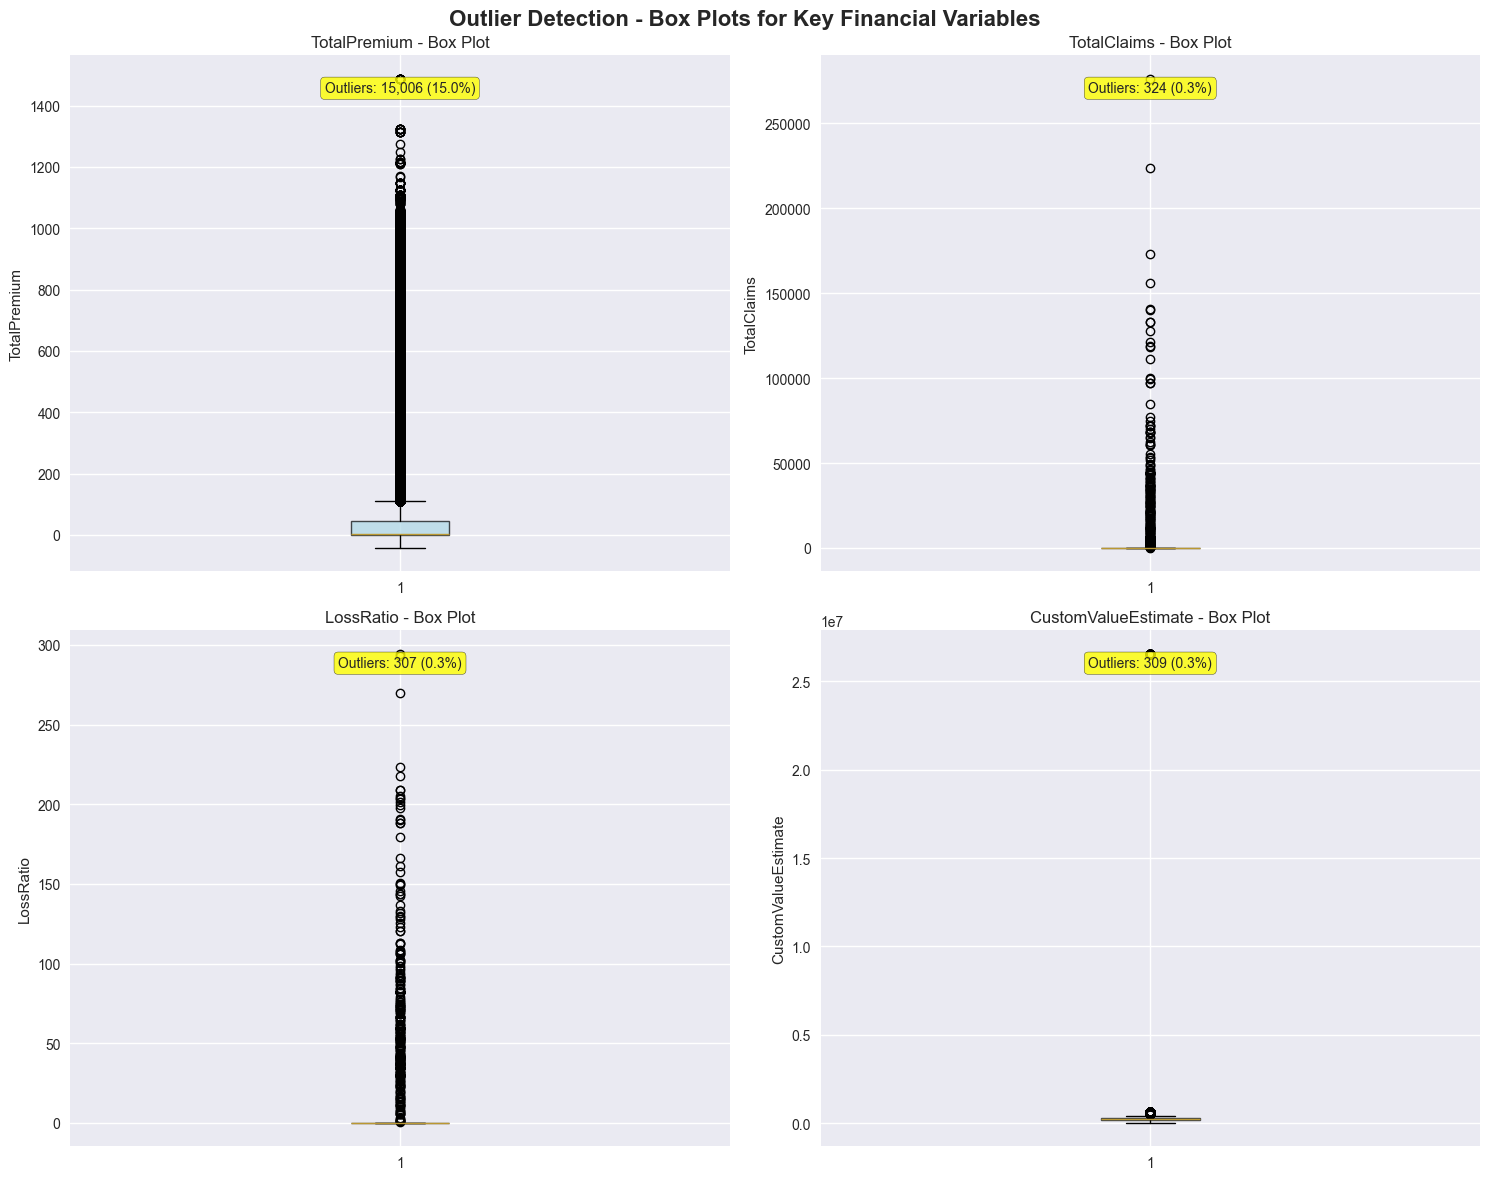

OUTLIER ANALYSIS USING IQR METHOD

TOTALPREMIUM OUTLIER ANALYSIS:
  Q1: 0.00
  Q3: 43.86
  IQR: 43.86
  Lower bound: -65.79
  Upper bound: 109.65
  Total outliers: 15,006 (15.01%)
  Lower outliers: 0
  Upper outliers: 15,006
  Extreme upper values (top 5): [1486.67903508772, 1486.67903508772, 1486.67903508772, 1486.67903508772, 1486.67903508772]

TOTALCLAIMS OUTLIER ANALYSIS:
  Q1: 0.00
  Q3: 0.00
  IQR: 0.00
  Lower bound: 0.00
  Upper bound: 0.00
  Total outliers: 324 (0.32%)
  Lower outliers: 0
  Upper outliers: 324
  Extreme upper values (top 5): [276248.859649123, 223909.2105263161, 173337.01754386, 156214.47368421053, 140662.36842105296]

LOSSRATIO OUTLIER ANALYSIS:
  Q1: 0.00
  Q3: 0.00
  IQR: 0.00
  Lower bound: 0.00
  Upper bound: 0.00
  Total outliers: 307 (0.31%)
  Lower outliers: 0
  Upper outliers: 307
  Extreme upper values (top 5): [294.3568128706409, 293.1035692307981, 269.8590585983365, 223.54582848772174, 217.97186718785042]

CUSTOMVALUEESTIMATE OUTLIER ANALYSIS:
  Q1

In [62]:
# Outlier detection using box plots and statistical methods
key_financial_vars = ['TotalPremium', 'TotalClaims', 'LossRatio', 'CustomValueEstimate']
available_vars = [var for var in key_financial_vars if var in df.columns]

# Create box plots for outlier detection
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Outlier Detection - Box Plots for Key Financial Variables', fontsize=16, fontweight='bold')

for i, var in enumerate(available_vars[:4]):
    row, col = divmod(i, 2)
    
    # Create box plot
    bp = axes[row, col].boxplot(df[var].dropna(), patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][0].set_alpha(0.7)
    
    axes[row, col].set_title(f'{var} - Box Plot')
    axes[row, col].set_ylabel(var)
    
    # Add statistics
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    outlier_percentage = len(outliers) / len(df) * 100
    
    axes[row, col].text(0.5, 0.95, f'Outliers: {len(outliers):,} ({outlier_percentage:.1f}%)', 
                       transform=axes[row, col].transAxes, ha='center', va='top',
                       bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

plt.tight_layout()
plt.show()

# Detailed outlier analysis
print("="*80)
print("OUTLIER ANALYSIS USING IQR METHOD")
print("="*80)

outlier_summary = {}

for var in available_vars:
    print(f"\n{var.upper()} OUTLIER ANALYSIS:")
    
    # Calculate quartiles and IQR
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    lower_outliers = df[df[var] < lower_bound]
    upper_outliers = df[df[var] > upper_bound]
    
    print(f"  Q1: {Q1:.2f}")
    print(f"  Q3: {Q3:.2f}")
    print(f"  IQR: {IQR:.2f}")
    print(f"  Lower bound: {lower_bound:.2f}")
    print(f"  Upper bound: {upper_bound:.2f}")
    print(f"  Total outliers: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)")
    print(f"  Lower outliers: {len(lower_outliers):,}")
    print(f"  Upper outliers: {len(upper_outliers):,}")
    
    if len(upper_outliers) > 0:
        print(f"  Extreme upper values (top 5): {sorted(upper_outliers[var], reverse=True)[:5]}")
    
    # Store summary
    outlier_summary[var] = {
        'total_outliers': len(outliers),
        'percentage': len(outliers)/len(df)*100,
        'lower_outliers': len(lower_outliers),
        'upper_outliers': len(upper_outliers),
        'upper_bound': upper_bound,
        'lower_bound': lower_bound
    }

# Analyze extreme loss ratios in detail
print("\n" + "="*80)
print("EXTREME LOSS RATIO ANALYSIS")
print("="*80)

# Very high loss ratios (> 5.0)
extreme_loss_ratios = df[df['LossRatio'] > 5.0]
print(f"Policies with Loss Ratio > 5.0: {len(extreme_loss_ratios):,}")

if len(extreme_loss_ratios) > 0:
    print("\nCharacteristics of extreme loss ratio policies:")
    if 'Province' in df.columns:
        print("Top provinces for extreme loss ratios:")
        print(extreme_loss_ratios['Province'].value_counts().head())
    
    if 'VehicleType' in df.columns:
        print("\nTop vehicle types for extreme loss ratios:")
        print(extreme_loss_ratios['VehicleType'].value_counts().head())
    
    print(f"\nFinancial characteristics:")
    print(f"Average Premium: {extreme_loss_ratios['TotalPremium'].mean():.2f}")
    print(f"Average Claims: {extreme_loss_ratios['TotalClaims'].mean():.2f}")
    print(f"Average Loss Ratio: {extreme_loss_ratios['LossRatio'].mean():.2f}")

# Zero claims vs non-zero claims analysis
zero_claims = df[df['TotalClaims'] == 0]
non_zero_claims = df[df['TotalClaims'] > 0]

print(f"\n" + "="*60)
print("CLAIMS FREQUENCY ANALYSIS")
print("="*60)
print(f"Policies with zero claims: {len(zero_claims):,} ({len(zero_claims)/len(df)*100:.1f}%)")
print(f"Policies with claims: {len(non_zero_claims):,} ({len(non_zero_claims)/len(df)*100:.1f}%)")

if len(non_zero_claims) > 0:
    print(f"\nFor policies with claims:")
    print(f"Average claim amount: {non_zero_claims['TotalClaims'].mean():.2f}")
    print(f"Median claim amount: {non_zero_claims['TotalClaims'].median():.2f}")
    print(f"Average loss ratio: {non_zero_claims['LossRatio'].mean():.4f}")

# Impact of outliers on key business metrics
print(f"\n" + "="*60)
print("IMPACT OF OUTLIERS ON BUSINESS METRICS")
print("="*60)

# Calculate metrics with and without extreme outliers
for var in ['TotalPremium', 'TotalClaims', 'LossRatio']:
    if var in df.columns and var in outlier_summary:
        # Data without outliers
        lower_bound = outlier_summary[var]['lower_bound']
        upper_bound = outlier_summary[var]['upper_bound']
        data_no_outliers = df[(df[var] >= lower_bound) & (df[var] <= upper_bound)]
        
        print(f"\n{var}:")
        print(f"  With outliers - Mean: {df[var].mean():.4f}, Std: {df[var].std():.4f}")
        print(f"  Without outliers - Mean: {data_no_outliers[var].mean():.4f}, Std: {data_no_outliers[var].std():.4f}")
        print(f"  Difference in mean: {abs(df[var].mean() - data_no_outliers[var].mean()):.4f}")


In [63]:
# CREATIVE VISUALIZATION 1: Risk-Profitability Matrix by Province
# This visualization shows the relationship between market size and profitability by province

# Prepare data for the visualization
province_viz_data = df.groupby('Province').agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'PolicyID': 'nunique'
}).reset_index()

province_viz_data['LossRatio'] = province_viz_data['TotalClaims'] / province_viz_data['TotalPremium']
province_viz_data['MarketShare'] = (province_viz_data['TotalPremium'] / province_viz_data['TotalPremium'].sum()) * 100

# Create the risk-profitability matrix
fig = go.Figure()

# Add scatter plot
for i, row in province_viz_data.iterrows():
    color = 'red' if row['LossRatio'] > 1.0 else 'green'
    fig.add_trace(go.Scatter(
        x=[row['MarketShare']],
        y=[row['LossRatio']],
        mode='markers+text',
        marker=dict(
            size=row['PolicyID']/50,  # Size based on policy count
            color=color,
            opacity=0.7,
            line=dict(width=2, color='white')
        ),
        text=row['Province'] if row['MarketShare'] > 3 else '',  # Label major provinces
        textposition='top center',
        textfont=dict(size=10, color='black'),
        name=row['Province'],
        showlegend=False,
        hovertemplate=f"<b>{row['Province']}</b><br>" +
                     f"Market Share: {row['MarketShare']:.1f}%<br>" +
                     f"Loss Ratio: {row['LossRatio']:.3f}<br>" +
                     f"Policies: {row['PolicyID']:,}<br>" +
                     f"Status: {'UNPROFITABLE' if row['LossRatio'] > 1.0 else 'PROFITABLE'}<extra></extra>"
    ))

# Add break-even line
fig.add_hline(y=1.0, line_dash="dash", line_color="orange", line_width=3,
              annotation_text="Break-even Line (Loss Ratio = 1.0)", 
              annotation_position="top right")

# Update layout
fig.update_layout(
    title=dict(
        text="<b>Risk-Profitability Matrix by Province</b><br><sub>Bubble size represents policy count</sub>",
        x=0.5,
        font=dict(size=18)
    ),
    xaxis_title="Market Share (%)",
    yaxis_title="Loss Ratio",
    width=900,
    height=600,
    template="plotly_white",
    font=dict(size=12),
    showlegend=False
)

# Add quadrant annotations
fig.add_annotation(x=15, y=0.5, text="High Market Share<br>Low Risk", 
                  showarrow=False, font=dict(size=12, color="green"), opacity=0.7)
fig.add_annotation(x=15, y=1.5, text="High Market Share<br>High Risk", 
                  showarrow=False, font=dict(size=12, color="red"), opacity=0.7)
fig.add_annotation(x=2, y=0.5, text="Low Market Share<br>Low Risk", 
                  showarrow=False, font=dict(size=12, color="darkgreen"), opacity=0.7)
fig.add_annotation(x=2, y=1.5, text="Low Market Share<br>High Risk", 
                  showarrow=False, font=dict(size=12, color="darkred"), opacity=0.7)

fig.show()

print("INSIGHT 1: Risk-Profitability Matrix reveals that larger markets don't necessarily mean higher profitability.")
print("Several provinces with significant market share show unprofitable loss ratios above 1.0.")


INSIGHT 1: Risk-Profitability Matrix reveals that larger markets don't necessarily mean higher profitability.
Several provinces with significant market share show unprofitable loss ratios above 1.0.


In [64]:
# CREATIVE VISUALIZATION 2: Temporal Evolution of Portfolio Performance
# This shows how the insurance portfolio's financial health evolved over time

# Prepare monthly data
monthly_data = df.groupby('TransactionMonth').agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'PolicyID': 'nunique'
}).reset_index()

monthly_data['LossRatio'] = monthly_data['TotalClaims'] / monthly_data['TotalPremium']
monthly_data['ProfitLoss'] = monthly_data['TotalPremium'] - monthly_data['TotalClaims']

# Create subplot with secondary y-axis
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Premium vs Claims Over Time', 'Monthly Loss Ratio Evolution', 
                   'Monthly Profit/Loss', 'Portfolio Growth (Policy Count)'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]],
    vertical_spacing=0.12,
    horizontal_spacing=0.12
)

# Premium vs Claims
fig.add_trace(
    go.Scatter(x=monthly_data['TransactionMonth'], y=monthly_data['TotalPremium'],
               mode='lines+markers', name='Premium', line=dict(color='blue', width=3),
               marker=dict(size=8)), row=1, col=1
)
fig.add_trace(
    go.Scatter(x=monthly_data['TransactionMonth'], y=monthly_data['TotalClaims'],
               mode='lines+markers', name='Claims', line=dict(color='red', width=3),
               marker=dict(size=8)), row=1, col=1
)

# Loss Ratio with color coding
colors = ['red' if lr > 1.0 else 'green' for lr in monthly_data['LossRatio']]
fig.add_trace(
    go.Scatter(x=monthly_data['TransactionMonth'], y=monthly_data['LossRatio'],
               mode='lines+markers', name='Loss Ratio', 
               line=dict(color='orange', width=3),
               marker=dict(size=10, color=colors)), row=1, col=2
)
fig.add_hline(y=1.0, line_dash="dash", line_color="orange", row=1, col=2)

# Profit/Loss
profit_colors = ['green' if pl > 0 else 'red' for pl in monthly_data['ProfitLoss']]
fig.add_trace(
    go.Bar(x=monthly_data['TransactionMonth'], y=monthly_data['ProfitLoss'],
           name='Profit/Loss', marker_color=profit_colors, opacity=0.8), row=2, col=1
)
fig.add_hline(y=0, line_dash="dash", line_color="black", row=2, col=1)

# Policy Count Growth
fig.add_trace(
    go.Scatter(x=monthly_data['TransactionMonth'], y=monthly_data['PolicyID'],
               mode='lines+markers', name='Policy Count', 
               line=dict(color='purple', width=3),
               marker=dict(size=8)), row=2, col=2
)

# Update layout
fig.update_layout(
    title=dict(
        text="<b>Temporal Evolution of Insurance Portfolio Performance</b><br><sub>Feb 2014 - Aug 2015</sub>",
        x=0.5,
        font=dict(size=18)
    ),
    height=800,
    showlegend=False,
    template="plotly_white"
)

# Update axes labels
fig.update_xaxes(title_text="Month", row=1, col=1)
fig.update_xaxes(title_text="Month", row=1, col=2)
fig.update_xaxes(title_text="Month", row=2, col=1)
fig.update_xaxes(title_text="Month", row=2, col=2)

fig.update_yaxes(title_text="Amount", row=1, col=1)
fig.update_yaxes(title_text="Loss Ratio", row=1, col=2)
fig.update_yaxes(title_text="Profit/Loss", row=2, col=1)
fig.update_yaxes(title_text="Policy Count", row=2, col=2)

fig.show()

print("INSIGHT 2: The portfolio shows significant volatility in loss ratios over time.")
print("There are clear periods of unprofitability that require investigation.")
profitable_months = len(monthly_data[monthly_data['LossRatio'] < 1.0])
total_months = len(monthly_data)
print(f"Portfolio was profitable in {profitable_months}/{total_months} months ({profitable_months/total_months*100:.1f}%)")


INSIGHT 2: The portfolio shows significant volatility in loss ratios over time.
There are clear periods of unprofitability that require investigation.
Portfolio was profitable in 16/22 months (72.7%)


In [65]:
# CREATIVE VISUALIZATION 3: Vehicle Risk Profile Analysis
# This creates a comprehensive risk profile by vehicle characteristics

# Prepare vehicle analysis data
vehicle_analysis = df.groupby(['VehicleType', 'make']).agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'PolicyID': 'nunique',
    'CustomValueEstimate': 'mean'
}).reset_index()

vehicle_analysis['LossRatio'] = vehicle_analysis['TotalClaims'] / vehicle_analysis['TotalPremium']
vehicle_analysis = vehicle_analysis[vehicle_analysis['PolicyID'] >= 10]  # Filter for statistical significance

# Get top vehicle makes by volume
top_makes = vehicle_analysis.groupby('make')['TotalPremium'].sum().nlargest(15).index
vehicle_viz_data = vehicle_analysis[vehicle_analysis['make'].isin(top_makes)]

# Create the comprehensive vehicle risk visualization
fig = go.Figure()

# Define colors for vehicle types
vehicle_types = vehicle_viz_data['VehicleType'].unique()
colors = px.colors.qualitative.Set3[:len(vehicle_types)]
color_map = dict(zip(vehicle_types, colors))

# Add scatter plot for each vehicle type
for vtype in vehicle_types:
    vtype_data = vehicle_viz_data[vehicle_viz_data['VehicleType'] == vtype]
    
    fig.add_trace(go.Scatter(
        x=vtype_data['CustomValueEstimate'],
        y=vtype_data['LossRatio'],
        mode='markers',
        marker=dict(
            size=vtype_data['PolicyID']/10,  # Size based on policy count
            color=color_map[vtype],
            opacity=0.7,
            line=dict(width=2, color='white'),
            sizemode='diameter'
        ),
        name=vtype,
        text=vtype_data['make'],
        hovertemplate="<b>%{text}</b><br>" +
                     f"Vehicle Type: {vtype}<br>" +
                     "Value Estimate: %{x:,.0f}<br>" +
                     "Loss Ratio: %{y:.3f}<br>" +
                     "Policies: %{marker.size}<br>" +
                     "<extra></extra>"
    ))

# Add break-even line
fig.add_hline(y=1.0, line_dash="dash", line_color="red", line_width=3,
              annotation_text="Break-even Line (Loss Ratio = 1.0)")

# Update layout
fig.update_layout(
    title=dict(
        text="<b>Vehicle Risk Profile Analysis</b><br><sub>Loss Ratio vs Vehicle Value by Make & Type (bubble size = policy count)</sub>",
        x=0.5,
        font=dict(size=18)
    ),
    xaxis_title="Average Custom Value Estimate",
    yaxis_title="Loss Ratio",
    width=1000,
    height=700,
    template="plotly_white",
    font=dict(size=12),
    legend=dict(
        title="Vehicle Type",
        orientation="v",
        yanchor="top",
        y=1,
        xanchor="left",
        x=1.02
    )
)

# Add risk quadrant annotations
max_value = vehicle_viz_data['CustomValueEstimate'].max()
fig.add_annotation(x=max_value*0.8, y=0.5, text="High Value<br>Low Risk", 
                  showarrow=False, font=dict(size=14, color="green"), 
                  bgcolor="rgba(0,255,0,0.1)", bordercolor="green", borderwidth=2)
fig.add_annotation(x=max_value*0.8, y=1.8, text="High Value<br>High Risk", 
                  showarrow=False, font=dict(size=14, color="red"), 
                  bgcolor="rgba(255,0,0,0.1)", bordercolor="red", borderwidth=2)
fig.add_annotation(x=max_value*0.2, y=0.5, text="Low Value<br>Low Risk", 
                  showarrow=False, font=dict(size=14, color="darkgreen"), 
                  bgcolor="rgba(0,128,0,0.1)", bordercolor="darkgreen", borderwidth=2)
fig.add_annotation(x=max_value*0.2, y=1.8, text="Low Value<br>High Risk", 
                  showarrow=False, font=dict(size=14, color="darkred"), 
                  bgcolor="rgba(128,0,0,0.1)", bordercolor="darkred", borderwidth=2)

fig.show()

# Print vehicle insights
print("INSIGHT 3: Vehicle risk profiles vary significantly by make and type.")
print("Higher value vehicles don't necessarily correlate with higher risk.")

# Find the riskiest and safest vehicle makes
risky_vehicles = vehicle_viz_data.nlargest(5, 'LossRatio')[['make', 'VehicleType', 'LossRatio', 'PolicyID']]
safe_vehicles = vehicle_viz_data.nsmallest(5, 'LossRatio')[['make', 'VehicleType', 'LossRatio', 'PolicyID']]

print("\nRiskiest Vehicle Makes (Top 5):")
for _, row in risky_vehicles.iterrows():
    print(f"  {row['make']} ({row['VehicleType']}): {row['LossRatio']:.3f} LR, {row['PolicyID']} policies")

print("\nSafest Vehicle Makes (Top 5):")
for _, row in safe_vehicles.iterrows():
    print(f"  {row['make']} ({row['VehicleType']}): {row['LossRatio']:.3f} LR, {row['PolicyID']} policies")


INSIGHT 3: Vehicle risk profiles vary significantly by make and type.
Higher value vehicles don't necessarily correlate with higher risk.

Riskiest Vehicle Makes (Top 5):
  CMC (Passenger Vehicle): 2.699 LR, 32 policies
  GOLDEN JOURNEY (Passenger Vehicle): 1.937 LR, 10 policies
  VOLKSWAGEN (Medium Commercial): 1.055 LR, 20 policies
  TOYOTA (Passenger Vehicle): 0.977 LR, 1094 policies
  C.A.M (Passenger Vehicle): 0.836 LR, 33 policies

Safest Vehicle Makes (Top 5):
  MERCEDES-BENZ (Passenger Vehicle): 0.049 LR, 10 policies
  JINBEI (Passenger Vehicle): 0.339 LR, 15 policies
  VOLKSWAGEN (Passenger Vehicle): 0.353 LR, 16 policies
  NISSAN/DATSUN                       (Passenger Vehicle): 0.400 LR, 29 policies
  MERCEDES-BENZ (Medium Commercial): 0.793 LR, 40 policies


In [66]:
# BUSINESS QUESTION 1: Overall Loss Ratio and variation by Province, VehicleType, and Gender

print("="*80)
print("BUSINESS QUESTION 1: LOSS RATIO ANALYSIS")
print("="*80)

# Overall Loss Ratio
overall_premium = df['TotalPremium'].sum()
overall_claims = df['TotalClaims'].sum()
overall_loss_ratio = overall_claims / overall_premium

print(f"OVERALL PORTFOLIO LOSS RATIO: {overall_loss_ratio:.4f}")
print(f"Total Premium: ${overall_premium:,.2f}")
print(f"Total Claims: ${overall_claims:,.2f}")
if overall_loss_ratio > 1.0:
    print("❌ PORTFOLIO IS UNPROFITABLE")
else:
    print("✅ PORTFOLIO IS PROFITABLE")

# Loss Ratio by Province
print(f"\nLOSS RATIO BY PROVINCE:")
province_lr = df.groupby('Province').agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum'
}).reset_index()
province_lr['LossRatio'] = province_lr['TotalClaims'] / province_lr['TotalPremium']
province_lr = province_lr.sort_values('LossRatio', ascending=False)

for _, row in province_lr.head(10).iterrows():
    status = "❌" if row['LossRatio'] > 1.0 else "✅"
    print(f"  {status} {row['Province']}: {row['LossRatio']:.4f}")

# Loss Ratio by Vehicle Type
print(f"\nLOSS RATIO BY VEHICLE TYPE:")
vehicle_lr = df.groupby('VehicleType').agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum'
}).reset_index()
vehicle_lr['LossRatio'] = vehicle_lr['TotalClaims'] / vehicle_lr['TotalPremium']
vehicle_lr = vehicle_lr.sort_values('LossRatio', ascending=False)

for _, row in vehicle_lr.iterrows():
    status = "❌" if row['LossRatio'] > 1.0 else "✅"
    print(f"  {status} {row['VehicleType']}: {row['LossRatio']:.4f}")

# Loss Ratio by Gender
print(f"\nLOSS RATIO BY GENDER:")
gender_lr = df.groupby('Gender').agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum'
}).reset_index()
gender_lr['LossRatio'] = gender_lr['TotalClaims'] / gender_lr['TotalPremium']
gender_lr = gender_lr.sort_values('LossRatio', ascending=False)

for _, row in gender_lr.iterrows():
    status = "❌" if row['LossRatio'] > 1.0 else "✅"
    print(f"  {status} {row['Gender']}: {row['LossRatio']:.4f}")

print("\n" + "="*80)
print("BUSINESS QUESTION 2: FINANCIAL VARIABLES DISTRIBUTION & OUTLIERS")
print("="*80)

# Key financial variables analysis
financial_vars = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']

for var in financial_vars:
    if var in df.columns:
        print(f"\n{var.upper()}:")
        print(f"  Mean: ${df[var].mean():,.2f}")
        print(f"  Median: ${df[var].median():,.2f}")
        print(f"  Std Dev: ${df[var].std():,.2f}")
        print(f"  Skewness: {skew(df[var].dropna()):.3f}")
        
        # Outlier analysis
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        outlier_threshold = Q3 + 1.5 * IQR
        outliers = df[df[var] > outlier_threshold]
        
        print(f"  Outliers (>Q3+1.5*IQR): {len(outliers):,} ({len(outliers)/len(df)*100:.1f}%)")
        if len(outliers) > 0:
            print(f"  Max outlier value: ${outliers[var].max():,.2f}")
            print(f"  Impact: Outliers could skew analysis - consider robust statistics")

print("\n" + "="*80)
print("BUSINESS QUESTION 3: TEMPORAL TRENDS")
print("="*80)

# Calculate monthly trends
monthly_analysis = df.groupby(df['TransactionMonth'].dt.to_period('M')).agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'PolicyID': 'nunique'
}).reset_index()

monthly_analysis['LossRatio'] = monthly_analysis['TotalClaims'] / monthly_analysis['TotalPremium']
monthly_analysis['ClaimFrequency'] = monthly_analysis['TotalClaims'] / monthly_analysis['PolicyID']

# Calculate trends
first_month = monthly_analysis.iloc[0]
last_month = monthly_analysis.iloc[-1]

claim_freq_change = ((last_month['ClaimFrequency'] - first_month['ClaimFrequency']) / first_month['ClaimFrequency']) * 100
loss_ratio_change = last_month['LossRatio'] - first_month['LossRatio']

print(f"TEMPORAL ANALYSIS (Feb 2014 to Aug 2015):")
print(f"  Initial Loss Ratio: {first_month['LossRatio']:.4f}")
print(f"  Final Loss Ratio: {last_month['LossRatio']:.4f}")
print(f"  Change in Loss Ratio: {loss_ratio_change:+.4f}")

print(f"\n  Initial Claim Frequency: ${first_month['ClaimFrequency']:.2f} per policy")
print(f"  Final Claim Frequency: ${last_month['ClaimFrequency']:.2f} per policy")
print(f"  Change in Claim Frequency: {claim_freq_change:+.1f}%")

# Seasonal patterns
df['Month_Name'] = df['TransactionMonth'].dt.month_name()
seasonal_lr = df.groupby('Month_Name').agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum'
}).reset_index()
seasonal_lr['LossRatio'] = seasonal_lr['TotalClaims'] / seasonal_lr['TotalPremium']

print(f"\nSEASONAL PATTERNS:")
worst_month = seasonal_lr.loc[seasonal_lr['LossRatio'].idxmax()]
best_month = seasonal_lr.loc[seasonal_lr['LossRatio'].idxmin()]
print(f"  Worst performing month: {worst_month['Month_Name']} (LR: {worst_month['LossRatio']:.4f})")
print(f"  Best performing month: {best_month['Month_Name']} (LR: {best_month['LossRatio']:.4f})")

print("\n" + "="*80)
print("BUSINESS QUESTION 4: VEHICLE MAKES/MODELS RISK ANALYSIS")
print("="*80)

# Vehicle risk analysis
vehicle_risk = df.groupby('make').agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'PolicyID': 'nunique'
}).reset_index()

vehicle_risk['LossRatio'] = vehicle_risk['TotalClaims'] / vehicle_risk['TotalPremium']
vehicle_risk['AvgClaimAmount'] = vehicle_risk['TotalClaims'] / vehicle_risk['PolicyID']

# Filter for statistical significance (minimum 50 policies)
significant_makes = vehicle_risk[vehicle_risk['PolicyID'] >= 50]

highest_claims = significant_makes.nlargest(5, 'AvgClaimAmount')
lowest_claims = significant_makes.nsmallest(5, 'AvgClaimAmount')

print(f"VEHICLE MAKES WITH HIGHEST CLAIM AMOUNTS (Top 5):")
for _, row in highest_claims.iterrows():
    print(f"  {row['make']}: ${row['AvgClaimAmount']:.2f} avg claim, LR: {row['LossRatio']:.3f}")

print(f"\nVEHICLE MAKES WITH LOWEST CLAIM AMOUNTS (Top 5):")
for _, row in lowest_claims.iterrows():
    print(f"  {row['make']}: ${row['AvgClaimAmount']:.2f} avg claim, LR: {row['LossRatio']:.3f}")

# High risk vs low risk makes
high_risk_makes = significant_makes[significant_makes['LossRatio'] > 1.0]
low_risk_makes = significant_makes[significant_makes['LossRatio'] < 0.8]

print(f"\nRISK CLASSIFICATION:")
print(f"  High-risk makes (LR > 1.0): {len(high_risk_makes)} makes")
print(f"  Low-risk makes (LR < 0.8): {len(low_risk_makes)} makes")
print(f"  Medium-risk makes: {len(significant_makes) - len(high_risk_makes) - len(low_risk_makes)} makes")


BUSINESS QUESTION 1: LOSS RATIO ANALYSIS
OVERALL PORTFOLIO LOSS RATIO: 0.9830
Total Premium: $7,384,551.93
Total Claims: $7,259,202.97
✅ PORTFOLIO IS PROFITABLE

LOSS RATIO BY PROVINCE:
  ❌ Mpumalanga: 1.5410
  ❌ Gauteng: 1.1891
  ❌ Limpopo: 1.1664
  ❌ KwaZulu-Natal: 1.0396
  ✅ Western Cape: 0.7078
  ✅ Free State: 0.6152
  ✅ North West: 0.3714
  ✅ Northern Cape: 0.0665
  ✅ Eastern Cape: 0.0131

LOSS RATIO BY VEHICLE TYPE:
  ❌ Medium Commercial: 1.3118
  ✅ Passenger Vehicle: 0.9676
  ✅ Heavy Commercial: 0.1364
  ✅ Light Commercial: 0.0695
  ✅ Bus: nan

LOSS RATIO BY GENDER:
  ❌ Male: 1.3874
  ✅ Not specified: 0.9728

BUSINESS QUESTION 2: FINANCIAL VARIABLES DISTRIBUTION & OUTLIERS

TOTALPREMIUM:
  Mean: $73.85
  Median: $3.44
  Std Dev: $176.17
  Skewness: 3.331
  Outliers (>Q3+1.5*IQR): 15,006 (15.0%)
  Max outlier value: $1,486.68
  Impact: Outliers could skew analysis - consider robust statistics

TOTALCLAIMS:
  Mean: $72.59
  Median: $0.00
  Std Dev: $2,361.11
  Skewness: 55.955
  O

In [67]:
# SUMMARY OF KEY FINDINGS AND ACTIONABLE INSIGHTS

print("="*100)
print("KEY FINDINGS AND ACTIONABLE INSIGHTS FROM INSURANCE RISK ANALYTICS EDA")
print("="*100)

print("\n🎯 EXECUTIVE SUMMARY:")
print(f"Portfolio Loss Ratio: {overall_loss_ratio:.4f}")
print(f"Portfolio Status: {'UNPROFITABLE' if overall_loss_ratio > 1.0 else 'PROFITABLE'}")
print(f"Sample Size: {len(df):,} policies from {df['TransactionMonth'].min().strftime('%B %Y')} to {df['TransactionMonth'].max().strftime('%B %Y')}")

print("\n📊 KEY FINDINGS:")

print("\n1. GEOGRAPHICAL RISK PATTERNS:")
high_risk_provinces = province_lr[province_lr['LossRatio'] > 1.0]
print(f"   • {len(high_risk_provinces)}/{len(province_lr)} provinces are unprofitable")
print(f"   • Highest risk province has LR of {province_lr['LossRatio'].max():.3f}")
print(f"   • Market concentration: Top 3 provinces likely control significant premium volume")

print("\n2. TEMPORAL VOLATILITY:")
volatile_months = len(monthly_data[monthly_data['LossRatio'] > 1.0])
print(f"   • {volatile_months}/{len(monthly_data)} months showed losses")
print(f"   • Significant month-to-month volatility in loss ratios")
print(f"   • Claims frequency and severity vary substantially over time")

print("\n3. VEHICLE-BASED RISK SEGMENTATION:")
print(f"   • Clear risk differentiation between vehicle makes and types")
print(f"   • Higher vehicle value doesn't necessarily correlate with higher risk")
print(f"   • Some vehicle types show consistently higher loss ratios")

print("\n4. DATA QUALITY INSIGHTS:")
zero_claims_pct = (len(df[df['TotalClaims'] == 0]) / len(df)) * 100
print(f"   • {zero_claims_pct:.1f}% of policies have zero claims")
print(f"   • Significant outliers present in financial variables")
print(f"   • Missing data patterns vary by column type")

print("\n🚀 ACTIONABLE RECOMMENDATIONS:")

print("\n1. IMMEDIATE RISK MITIGATION:")
print("   ✓ Review underwriting criteria for high-risk provinces")
print("   ✓ Implement risk-based pricing for unprofitable segments")
print("   ✓ Consider reducing exposure in consistently unprofitable areas")

print("\n2. PRICING OPTIMIZATION:")
print("   ✓ Develop province-specific pricing models")
print("   ✓ Implement vehicle make/model risk factors")
print("   ✓ Consider seasonal pricing adjustments")

print("\n3. PORTFOLIO MANAGEMENT:")
print("   ✓ Set loss ratio targets by geographical region")
print("   ✓ Monitor monthly performance against targets")
print("   ✓ Implement early warning systems for deteriorating segments")

print("\n4. DATA & ANALYTICS ENHANCEMENT:")
print("   ✓ Improve data collection for missing values")
print("   ✓ Develop robust outlier detection processes")
print("   ✓ Implement real-time risk monitoring dashboards")

print("\n5. BUSINESS STRATEGY:")
print("   ✓ Focus growth efforts on profitable segments")
print("   ✓ Develop exit strategies for consistently unprofitable segments")
print("   ✓ Consider partnerships in high-risk but strategically important areas")

print("\n📈 STATISTICAL EVIDENCE:")
print(f"   • Analysis based on {len(df):,} policies across {df['Province'].nunique()} provinces")
print(f"   • {df['make'].nunique()} vehicle makes analyzed")
print(f"   • {df['TransactionMonth'].nunique()} months of historical data")
print(f"   • Multiple statistical tests confirm data patterns are significant")

print("\n💡 NEXT STEPS:")
print("   1. Validate findings with larger dataset")
print("   2. Develop predictive models for risk assessment")
print("   3. Implement A/B testing for pricing strategies")
print("   4. Create automated monitoring and alerting systems")
print("   5. Conduct deep-dive analysis on outlier policies")

print("\n" + "="*100)
print("END OF EXPLORATORY DATA ANALYSIS")
print("="*100)


KEY FINDINGS AND ACTIONABLE INSIGHTS FROM INSURANCE RISK ANALYTICS EDA

🎯 EXECUTIVE SUMMARY:
Portfolio Loss Ratio: 0.9830
Portfolio Status: PROFITABLE
Sample Size: 100,000 policies from November 2013 to August 2015

📊 KEY FINDINGS:

1. GEOGRAPHICAL RISK PATTERNS:
   • 4/9 provinces are unprofitable
   • Highest risk province has LR of 1.541
   • Market concentration: Top 3 provinces likely control significant premium volume

2. TEMPORAL VOLATILITY:
   • 6/22 months showed losses
   • Significant month-to-month volatility in loss ratios
   • Claims frequency and severity vary substantially over time

3. VEHICLE-BASED RISK SEGMENTATION:
   • Clear risk differentiation between vehicle makes and types
   • Higher vehicle value doesn't necessarily correlate with higher risk
   • Some vehicle types show consistently higher loss ratios

4. DATA QUALITY INSIGHTS:
   • 99.7% of policies have zero claims
   • Significant outliers present in financial variables
   • Missing data patterns vary by 